<h1>Telecom Churn Analysis</h1>

### Problem Statement - 

To Analyse customer-level data of a leading telecom firm and build predictive models to identify customers at high risk of churn and identify the main indicators of churn. Also, In this project, one will have to use the <u>usage-based definition to define churn</u> - Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time. Moreover the customers we need to analyse are <u>High Value Customers</u>

We need to analyse customer behavior for the months of June(6),July(7) and August(8) and predict if the user will churn in the 9th month(September) or not.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
from datetime import date
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
warnings.filterwarnings('ignore')

In [2]:
pd.options.display.max_seq_items = 2000
pd.options.display.max_rows = 4000
pd.set_option('display.max_columns', None)

In [364]:
# reading the data
data = pd.read_csv('telecom_churn_data.csv')

In [4]:
data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [5]:
# wanted to look out for all the related columns
# list(filter(lambda x:x if 'rech' in x else "",data.columns))

In [6]:
# checking one entry
#data.iloc[0]

In [365]:
# checking a combination of variables
data[['total_rech_amt_6','arpu_6','jun_vbc_3g','fb_user_6','sachet_3g_6','night_pck_user_6','av_rech_amt_data_6','count_rech_2g_6','total_rech_num_6','total_rech_data_6','total_rech_data_6','onnet_mou_6','loc_og_t2t_mou_6','loc_ic_t2t_mou_6','vol_3g_mb_6','std_og_mou_6','std_og_t2t_mou_6','std_og_t2o_mou','std_og_t2m_mou_6','std_og_t2f_mou_6','std_og_t2c_mou_6']].head()

total_rech_amt_6   arpu_6  jun_vbc_3g  fb_user_6  sachet_3g_6  \
0               362  197.385      101.20        1.0            0   
1                74   34.047        0.00        NaN            0   
2               168  167.690        4.17        NaN            0   
3               230  221.338        0.00        NaN            0   
4               196  261.636        0.00        0.0            0   

   night_pck_user_6  av_rech_amt_data_6  count_rech_2g_6  total_rech_num_6  \
0               0.0               252.0              0.0                 4   
1               NaN                 NaN              NaN                 4   
2               NaN                 NaN              NaN                 5   
3               NaN                 NaN              NaN                10   
4               0.0                56.0              1.0                 5   

   total_rech_data_6  total_rech_data_6  onnet_mou_6  loc_og_t2t_mou_6  \
0                1.0                1.0          NaN               NaN   
1                NaN                NaN        24.11             23.88   
2                NaN                NaN        11.54              7.19   
3                NaN                NaN        99.91             73.68   
4                1.0                1.0        50.31             50.31   

   loc_ic_t2t_mou_6  vol_3g_mb_6  std_og_mou_6  std_og_t2t_mou_6  \
0               NaN        83.57           NaN               NaN   
1              1.61         0.00          0.23              0.23   
2            115.69         0.00         47.64              4.34   
3             62.08         0.00         29.23             26.23   
4            105.68         0.00          9.31              0.00   

   std_og_t2o_mou  std_og_t2m_mou_6  std_og_t2f_mou_6  std_og_t2c_mou_6  
0             0.0               NaN               NaN               NaN  
1             0.0              0.00              0.00               0.0  
2             0.0             41.81              1.48               0.0  
3             0.0              2.99              0.00               0.0  
4             0.0              9.31              0.00               0.0

In [367]:
# checking a combination of variables
data[data['std_og_t2c_mou_7'].isnull()==False][['std_og_t2c_mou_7','arpu_6','arpu_7','arpu_8','arpu_9']].head()

std_og_t2c_mou_7   arpu_6   arpu_7   arpu_8   arpu_9
1               0.0   34.047  355.074  268.321   86.285
2               0.0  167.690  189.058  210.226  290.714
3               0.0  221.338  251.102  508.054  389.500
4               0.0  261.636  309.876  238.174  163.426
5               0.0   50.258   58.810   83.386  170.826

In [9]:
# checking the variable
data['sachet_3g_6'].describe()

count    99999.000000
mean         0.074781
std          0.568344
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         29.000000
Name: sachet_3g_6, dtype: float64

In [368]:
# checking if it is a categorical or a numerical field
data['jun_vbc_3g'].value_counts()

0.00       84870
0.06          10
0.03          10
0.11           8
0.15           7
0.52           7
0.04           7
2.21           6
0.08           6
0.10           6
0.02           6
1.93           6
0.20           6
0.32           6
0.28           5
0.22           5
1.77           5
0.91           5
0.23           5
2.71           5
4.96           5
0.26           5
0.57           5
0.72           5
0.19           5
1.89           4
71.18          4
4.94           4
0.29           4
3.95           4
42.89          4
0.14           4
0.41           4
0.27           4
47.90          4
40.66          4
0.36           4
84.83          4
0.17           4
43.74          4
166.46         4
10.34          4
1.17           4
0.09           4
0.44           4
1.16           4
0.68           4
3.13           4
1.57           4
0.05           4
21.81          4
15.64          4
0.24           4
156.51         4
1.38           4
0.39           4
0.50           4
1.28           4
20.05         

(0, 20)

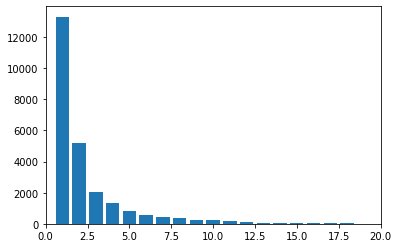

In [11]:
# plotting the variable
plt.bar(x=data['total_rech_data_6'].value_counts().index,height=data['total_rech_data_6'].value_counts())
plt.xlim(0,20)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [13]:
# The number of variables which have null values
data.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

In [14]:
data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

### Filtering out high value customers <br><br>

As the variables - total_rech_amt_6 and total_rech_amt_7 have no null values, we can use them to filter out high value customers and then clean the data and fill null values

In [15]:
# 70th quantile for recharge amount in month 6 and 7 is 737
(data['total_rech_amt_6']+data['total_rech_amt_7']).quantile(0.7)

737.0

In [16]:
# around 29k customers will be categorised as high value customers
len(data[(data['total_rech_amt_6']+data['total_rech_amt_7'])>737])

29979

In [17]:
high_valued = data[(data['total_rech_amt_6']+data['total_rech_amt_7'])>737]

In [18]:
high_valued.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
13     7002191713        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
17     7000187447        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
13            6/30/2014            7/31/2014            8/31/2014   
16            6/30/2014            7/31/2014            8/31/2014   
17            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
7             9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
8             9/30/2014   378.721   492.223   137.362  166.787       413.69   
13            9/30/2014   492.846   205.671   593.260  322.732       501.76   
16            9/30/2014   430.975   299.869   187.894  206.490        50.51   
17            9/30/2014   690.008    18.980    25.499  257.583      1185.91   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
7         54.68        52.29          NaN        453.43        567.16   
8        351.03        35.08        33.46         94.66         80.63   
13       108.39       534.24       244.81        413.31        119.28   
16        74.01        70.61        31.34        296.29        229.74   
17         9.28         7.79       558.51         61.64          0.00   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
7         325.91           NaN          16.23          33.49          31.64   
8         136.48        108.71           0.00           0.00           0.00   
13        482.46        214.06          23.53         144.24          72.11   
16        162.76        224.39           0.00           2.83           0.00   
17          5.54         87.89           0.00           4.76           4.81   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
7             NaN          23.74          12.59          38.06            NaN   
8            0.00           0.00           0.00           0.00           0.00   
13         136.78           7.98          35.26           1.44          12.78   
16           0.00           0.00          17.74           0.00           0.00   
17           0.00           0.00           8.46          13.34          17.98   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
7              51.39             31.38             40.28               NaN   
8             297.13            217.59             12.49             26.13   
13             49.63              6.19             36.01              6.14   
16             42.61             65.16             67.38             26.88   
17             38.99              0.00              0.00             36.41   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
7             308.63            447.38            162.28               NaN   
8              80.96             70.58             50.54             34.58   
13            151.13             47.28            294.46            108.24   
16            273.29            145.99            128.28            201.49   
17             58.54              0.00              0.00              9.38   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
7              62.13             55.14             53.23               NaN   
8               0.00              0.00              0.00              0.00   
13              4.54              0.00             23.51    

### Tagging Churners and Non Churners

Will be tagging churners based on 'Usage-based churn' i.e. Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. in the target month (month=9)

In [19]:
high_valued[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].isnull().sum()

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

#### As there are no null values for the above 4 variables, they can be used to tag the churn and non churn customers. 

In [20]:
# 2589 churners to be tagged
len(high_valued[(high_valued['total_ic_mou_9']==0) & (high_valued['total_og_mou_9']==0) & (high_valued['vol_2g_mb_9']==0) & (high_valued['vol_3g_mb_9']==0)])

2589

In [21]:
# applying churn tag
high_valued['churn'] = high_valued[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].apply(lambda x:1 if sum(x)==0 else 0,axis=1)

In [22]:
high_valued[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','churn']].head()

total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9  churn
7             0.00            0.00          0.0          0.0      1
8            34.91          142.18          0.0          0.0      0
13          631.86          446.09          0.0          0.0      0
16          334.56          255.74          0.0          0.0      0
17           87.13          631.08          0.0          0.0      0

In [23]:
high_valued['churn'].value_counts()

0    27390
1     2589
Name: churn, dtype: int64

In [24]:
print("Churned customers in the dataset are {}%".format(round((2589/29979)*100,1)))

Churned customers in the dataset are 8.6%


#### Hence we would need to manage the class imbalance too

#### Some ways to manage class imbalance - 
<ol>
    <li>Using an appropriate <b>evaluation metric</b>. Here we are more concerned about detecting class 1. Hence <b>Sensitivity/recall</b>, which is ratio of True Positives predicted over all the Positives, should be considered.</li>
    <li>Using algorithms that perform better on imbalanced class like Decision tress or Random Forest(Bagging) or even Boosting algorithms can help. <b>Another advantage of using tree based algorithms are that they are not affected by outliers in the data</b></li>
    <li><b>Undersampling Majority Class</b> - drawback - removing information. Also this method is good where we have a huge data to work on.</li>
    <li>Synthetic Minority Oversampling Technique - <b>SMOTE</b> uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model.</li>
</ol>

<a href='https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18'>This link</a> is from where I read about the points mentioned above.

In [25]:
high_valued.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
13     7002191713        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
17     7000187447        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
13            6/30/2014            7/31/2014            8/31/2014   
16            6/30/2014            7/31/2014            8/31/2014   
17            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
7             9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
8             9/30/2014   378.721   492.223   137.362  166.787       413.69   
13            9/30/2014   492.846   205.671   593.260  322.732       501.76   
16            9/30/2014   430.975   299.869   187.894  206.490        50.51   
17            9/30/2014   690.008    18.980    25.499  257.583      1185.91   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
7         54.68        52.29          NaN        453.43        567.16   
8        351.03        35.08        33.46         94.66         80.63   
13       108.39       534.24       244.81        413.31        119.28   
16        74.01        70.61        31.34        296.29        229.74   
17         9.28         7.79       558.51         61.64          0.00   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
7         325.91           NaN          16.23          33.49          31.64   
8         136.48        108.71           0.00           0.00           0.00   
13        482.46        214.06          23.53         144.24          72.11   
16        162.76        224.39           0.00           2.83           0.00   
17          5.54         87.89           0.00           4.76           4.81   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
7             NaN          23.74          12.59          38.06            NaN   
8            0.00           0.00           0.00           0.00           0.00   
13         136.78           7.98          35.26           1.44          12.78   
16           0.00           0.00          17.74           0.00           0.00   
17           0.00           0.00           8.46          13.34          17.98   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
7              51.39             31.38             40.28               NaN   
8             297.13            217.59             12.49             26.13   
13             49.63              6.19             36.01              6.14   
16             42.61             65.16             67.38             26.88   
17             38.99              0.00              0.00             36.41   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
7             308.63            447.38            162.28               NaN   
8              80.96             70.58             50.54             34.58   
13            151.13             47.28            294.46            108.24   
16            273.29            145.99            128.28            201.49   
17             58.54              0.00              0.00              9.38   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
7              62.13             55.14             53.23               NaN   
8               0.00              0.00              0.00              0.00   
13              4.54              0.00             23.51    

<h5>Removing all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).</h5>

In [26]:
def remove_cols(list_of_cols):
    high_valued.drop(list_of_cols,inplace=True,axis=1)

In [27]:
# Removing all the attributes having ‘ _9’ in their column name
remove_cols(list(filter(lambda x:x if '_9' in x else "",data.columns)))

### Filling the null values

In [28]:
high_valued.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou                114
std_og_t2o_mou                114
loc_ic_t2o_mou                114
last_date_of_month_6            0
last_date_of_month_7           31
last_date_of_month_8          157
arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                   316
onnet_mou_7                   303
onnet_mou_8                   938
offnet_mou_6                  316
offnet_mou_7                  303
offnet_mou_8                  938
roam_ic_mou_6                 316
roam_ic_mou_7                 303
roam_ic_mou_8                 938
roam_og_mou_6                 316
roam_og_mou_7                 303
roam_og_mou_8                 938
loc_og_t2t_mou_6              316
loc_og_t2t_mou_7              303
loc_og_t2t_mou_8              938
loc_og_t2m_mou_6              316
loc_og_t2m_mou_7              303
loc_og_t2m_mou_8              938
loc_og_t2f_mou

In [29]:
high_valued['loc_ic_t2o_mou'].value_counts()

0.0    29865
Name: loc_ic_t2o_mou, dtype: int64

<b>Variables loc_og_t2o_mou,std_og_t2o_mou and loc_ic_t2o_mou have value either as 0 or Null.Hence the Null values should also be made 0 as they do not represent anything other than the fact that no call was made.</b>

In [30]:
high_valued['loc_ic_t2o_mou'].fillna(0,inplace=True)

In [31]:
high_valued['loc_ic_t2o_mou'].value_counts()

0.0    29979
Name: loc_ic_t2o_mou, dtype: int64

Making a function to fill null values

In [32]:
# function to fill null values
def fill_none(list_columns,value,flag_mnth=False):
    if flag_mnth==False:
        for col in list_columns:
            high_valued[col].fillna(value,inplace=True)
    elif flag_mnth==True:
        for col in list_columns:
            for i in range(6,9):
                high_valued[col+"_"+str(i)].fillna(value,inplace=True)


In [33]:
fill_none(['loc_og_t2o_mou','std_og_t2o_mou'],0)

<b>In the following columns, Null value needs to be filled by 0 as they are cases where the data recharge was done while no call was made and vice versa. Either all columns related to the data/internet are null or all columns related to calls are null. This shows that entirely either the calls were not made or the internet/data was not subscribed</b><br><br>
<b>Also since total_rech_amt_6, total_rech_amt_7 and total_rech_amt_8 have no null values are an indicator that there is no datapoint where the complete row is null</b>

In [34]:
fill_none(['onnet_mou','offnet_mou','roam_ic_mou','loc_og_t2t_mou','loc_og_t2m_mou','loc_og_t2f_mou','loc_og_t2f_mou','loc_og_t2c_mou','loc_og_mou','std_og_t2t_mou','std_og_t2m_mou','std_og_t2f_mou','std_og_t2c_mou','std_og_mou','isd_og_mou','spl_og_mou','og_others','loc_ic_t2t_mou','loc_ic_t2m_mou','loc_ic_t2f_mou','loc_ic_mou','std_ic_t2t_mou','std_ic_t2m_mou','std_ic_t2f_mou','std_ic_t2o_mou','std_ic_mou','spl_ic_mou','isd_ic_mou','ic_others','roam_og_mou'],0,True)

In [35]:
# checking some combination of variables
# high_valued[high_valued['total_rech_data_6'].isnull()==True].head()

In [36]:
fill_none(['total_rech_data','max_rech_data','count_rech_2g','count_rech_3g','av_rech_amt_data','arpu_3g','arpu_2g','night_pck_user','fb_user'],0,True)

In [37]:
high_valued[['arpu_6','arpu_7','arpu_8']].describe()

arpu_6        arpu_7        arpu_8
count  29979.000000  29979.000000  29979.000000
mean     587.587624    589.424681    535.067748
std      442.848876    463.049067    492.447887
min    -2258.709000  -2014.045000   -945.808000
25%      364.352500    365.235000    289.782000
50%      495.951000    493.781000    452.232000
75%      704.184500    700.986000    671.349500
max    27731.088000  35145.834000  33543.624000

There are some negative values for revenue which cannot be there. Lets see how many such values are there

In [38]:
len(high_valued[high_valued['arpu_6']<0])

34

In [39]:
len(high_valued[high_valued['arpu_7']<0])

41

In [40]:
len(high_valued[high_valued['arpu_8']<0])

76

As their number is very low, lets remove these rows

In [41]:
high_valued.drop(high_valued.loc[high_valued['arpu_8']<0].index, inplace=True)

In [42]:
high_valued.drop(high_valued.loc[high_valued['arpu_7']<0].index, inplace=True)

In [43]:
high_valued.drop(high_valued.loc[high_valued['arpu_6']<0].index, inplace=True)

### Creating a derived variable - Days since last recharge

Converting into the datetime format

In [44]:
high_valued['date_of_last_rech_data_6'] = pd.to_datetime(high_valued['date_of_last_rech_data_6'])

In [45]:
high_valued['date_of_last_rech_data_7'] = pd.to_datetime(high_valued['date_of_last_rech_data_7'])
high_valued['date_of_last_rech_data_8'] = pd.to_datetime(high_valued['date_of_last_rech_data_8'])

In [46]:
high_valued['date_of_last_rech_6'] = pd.to_datetime(high_valued['date_of_last_rech_6'])
high_valued['date_of_last_rech_7'] = pd.to_datetime(high_valued['date_of_last_rech_7'])
high_valued['date_of_last_rech_8'] = pd.to_datetime(high_valued['date_of_last_rech_8'])

Finding the maximum date among these - 

In [47]:
# finding the latest date of recharge:
high_valued['latest_date_rech'] = high_valued[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']].apply(lambda x:x.max() if (max(x) is not None) else"NA",axis=1)

In [48]:
high_valued[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','latest_date_rech']].head()

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
7           2014-06-27          2014-07-25          2014-08-26   
8           2014-06-25          2014-07-31          2014-08-30   
13          2014-06-20          2014-07-22          2014-08-30   
16          2014-06-30          2014-07-31          2014-08-14   
17          2014-06-30          2014-07-30          2014-08-25   

   date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8  \
7                       NaT                      NaT                      NaT   
8                       NaT               2014-07-31               2014-08-23   
13                      NaT                      NaT               2014-08-30   
16                      NaT                      NaT                      NaT   
17                      NaT                      NaT                      NaT   

   latest_date_rech  
7        2014-08-26  
8        2014-08-30  
13       2014-08-30  
16       2014-08-14  
17       2014-08-25

In [49]:
len(high_valued[high_valued['latest_date_rech'].isnull()==True])

0

In [50]:
# Other date columns can now be removed
high_valued.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','last_date_of_month_7','last_date_of_month_6'],axis=1,inplace=True)

Now that we have the latest date of recharge, we can find the days since the last recharge from 31st August. Logically, the more the number of days it had been since the person had recharged from 31st August, the more should be his/her chances of churning

In [51]:
d = date(2014, 8, 31)
type(d)

datetime.date

In [52]:
high_valued['days_since_recharge'] = high_valued['latest_date_rech'].apply(lambda x:(d-x.date()).days)

In [53]:
high_valued[['latest_date_rech','days_since_recharge']].head()

latest_date_rech  days_since_recharge
7        2014-08-26                    5
8        2014-08-30                    1
13       2014-08-30                    1
16       2014-08-14                   17
17       2014-08-25                    6

In [54]:
# Now I can delete the column - latest_date_rech 
high_valued.drop('latest_date_rech',axis=1,inplace=True)

In [55]:
high_valued.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
13     7002191713        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
17     7000187447        109             0.0             0.0             0.0   

   last_date_of_month_8    arpu_6    arpu_7    arpu_8  onnet_mou_6  \
7             8/31/2014  1069.180  1349.850  3171.480        57.84   
8             8/31/2014   378.721   492.223   137.362       413.69   
13            8/31/2014   492.846   205.671   593.260       501.76   
16            8/31/2014   430.975   299.869   187.894        50.51   
17            8/31/2014   690.008    18.980    25.499      1185.91   

    onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
7         54.68        52.29        453.43        567.16        325.91   
8        351.03        35.08         94.66         80.63        136.48   
13       108.39       534.24        413.31        119.28        482.46   
16        74.01        70.61        296.29        229.74        162.76   
17         9.28         7.79         61.64          0.00          5.54   

    roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
7           16.23          33.49          31.64          23.74          12.59   
8            0.00           0.00           0.00           0.00           0.00   
13          23.53         144.24          72.11           7.98          35.26   
16           0.00           2.83           0.00           0.00          17.74   
17           0.00           4.76           4.81           0.00           8.46   

    roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
7           38.06             51.39             31.38             40.28   
8            0.00            297.13            217.59             12.49   
13           1.44             49.63              6.19             36.01   
16           0.00             42.61             65.16             67.38   
17          13.34             38.99              0.00              0.00   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
7             308.63            447.38            162.28             62.13   
8              80.96             70.58             50.54              0.00   
13            151.13             47.28            294.46              4.54   
16            273.29            145.99            128.28              0.00   
17             58.54              0.00              0.00              0.00   

    loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
7              55.14             53.23               0.0               0.0   
8               0.00              0.00               0.0               0.0   
13              0.00             23.51               0.0               0.0   
16              4.48             10.26               0.0               0.0   
17              0.00              0.00               0.0               0.0   

    loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
7               0.00        422.16        533.91        255.79   
8               7.15        378.09        288.18         63.04   
13              0.49        205.31         53.48        353.99   
16              0.00        315.91        215.64        205.93   
17              0.00         97.54          0.00          0.00   

    std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
7               4.30             23.29             12.01             49.89   
8             116.56            133.43             22.58             13.69   
13            446.41             85.98            498.23            255.36   
16              7.89              2.58              3.23             22.

In [56]:
# this column can also be dropped
high_valued.drop('last_date_of_month_8',axis=1,inplace=True)

Bucketing the columns dealing with 3g,2g and sachet packs into yes or no. If they were subscribed or not . I feel that specially with High Valued customers, rather than the amount of money they have invested in these packs, what matters more is if they subscribed to it altogether or not.

In [57]:
high_valued['monthly_2g_6'] = high_valued['monthly_2g_6'].apply(lambda x:1 if x>0 else 0)
high_valued['monthly_2g_7'] = high_valued['monthly_2g_7'].apply(lambda x:1 if x>0 else 0)
high_valued['monthly_2g_8'] = high_valued['monthly_2g_8'].apply(lambda x:1 if x>0 else 0)
high_valued['monthly_3g_6'] = high_valued['monthly_3g_6'].apply(lambda x:1 if x>0 else 0)
high_valued['monthly_3g_7'] = high_valued['monthly_3g_7'].apply(lambda x:1 if x>0 else 0)
high_valued['monthly_3g_8'] = high_valued['monthly_3g_8'].apply(lambda x:1 if x>0 else 0)
high_valued['sachet_2g_6'] = high_valued['sachet_2g_6'].apply(lambda x:1 if x>0 else 0)
high_valued['sachet_2g_7'] = high_valued['sachet_2g_7'].apply(lambda x:1 if x>0 else 0)
high_valued['sachet_2g_8'] = high_valued['sachet_2g_8'].apply(lambda x:1 if x>0 else 0)

In [58]:
high_valued.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
13     7002191713        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
17     7000187447        109             0.0             0.0             0.0   

      arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
13   492.846   205.671   593.260       501.76       108.39       534.24   
16   430.975   299.869   187.894        50.51        74.01        70.61   
17   690.008    18.980    25.499      1185.91         9.28         7.79   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
13        413.31        119.28        482.46          23.53         144.24   
16        296.29        229.74        162.76           0.00           2.83   
17         61.64          0.00          5.54           0.00           4.76   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
13          72.11           7.98          35.26           1.44   
16           0.00           0.00          17.74           0.00   
17           4.81           0.00           8.46          13.34   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17          

In [59]:
high_valued.drop('mobile_number',axis=1,inplace=True)

In [60]:
# there is just one circle id across all the data points and hence is redundant
high_valued.drop('circle_id',axis=1,inplace=True)

In [61]:
high_valued.drop('sep_vbc_3g',axis=1,inplace=True)

In [62]:
high_valued.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
7              0.0             0.0             0.0  1069.180  1349.850   
8              0.0             0.0             0.0   378.721   492.223   
13             0.0             0.0             0.0   492.846   205.671   
16             0.0             0.0             0.0   430.975   299.869   
17             0.0             0.0             0.0   690.008    18.980   

      arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
7   3171.480        57.84        54.68        52.29        453.43   
8    137.362       413.69       351.03        35.08         94.66   
13   593.260       501.76       108.39       534.24        413.31   
16   187.894        50.51        74.01        70.61        296.29   
17    25.499      1185.91         9.28         7.79         61.64   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
7         567.16        325.91          16.23          33.49          31.64   
8          80.63        136.48           0.00           0.00           0.00   
13        119.28        482.46          23.53         144.24          72.11   
16        229.74        162.76           0.00           2.83           0.00   
17          0.00          5.54           0.00           4.76           4.81   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
7           23.74          12.59          38.06             51.39   
8            0.00           0.00           0.00            297.13   
13           7.98          35.26           1.44             49.63   
16           0.00          17.74           0.00             42.61   
17           0.00           8.46          13.34             38.99   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
7              31.38             40.28            308.63            447.38   
8             217.59             12.49             80.96             70.58   
13              6.19             36.01            151.13             47.28   
16             65.16             67.38            273.29            145.99   
17              0.00              0.00             58.54              0.00   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
7             162.28             62.13             55.14             53.23   
8              50.54              0.00              0.00              0.00   
13            294.46              4.54              0.00             23.51   
16            128.28              0.00              4.48             10.26   
17              0.00              0.00              0.00              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
7                0.0               0.0              0.00        422.16   
8                0.0               0.0              7.15        378.09   
13               0.0               0.0              0.49        205.31   
16               0.0               0.0              0.00        315.91   
17               0.0               0.0              0.00         97.54   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
7         533.91        255.79              4.30             23.29   
8         288.18         63.04            116.56            133.43   
13         53.48        353.99            446.41             85.98   
16        215.64        205.93              7.89              2.58   
17          0.00          0.00           1146.91              0.81   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
7              12.01             49.89             31.76             49.14   
8              22.58             13.69             10.04             75.69   
13            498.23            255.36             52.94            156.94   
16              3.23             22.99             64.51             18.29   
17              0.00              1.55              0.00    

In [63]:
high_valued.reset_index(inplace=True)

In [64]:
y = high_valued["churn"]

In [65]:
high_valued.drop('index',inplace=True,axis=1)

In [66]:
high_valued.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0             0.0             0.0             0.0  1069.180  1349.850   
1             0.0             0.0             0.0   378.721   492.223   
2             0.0             0.0             0.0   492.846   205.671   
3             0.0             0.0             0.0   430.975   299.869   
4             0.0             0.0             0.0   690.008    18.980   

     arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0  3171.480        57.84        54.68        52.29        453.43   
1   137.362       413.69       351.03        35.08         94.66   
2   593.260       501.76       108.39       534.24        413.31   
3   187.894        50.51        74.01        70.61        296.29   
4    25.499      1185.91         9.28         7.79         61.64   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0        567.16        325.91          16.23          33.49          31.64   
1         80.63        136.48           0.00           0.00           0.00   
2        119.28        482.46          23.53         144.24          72.11   
3        229.74        162.76           0.00           2.83           0.00   
4          0.00          5.54           0.00           4.76           4.81   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0          23.74          12.59          38.06             51.39   
1           0.00           0.00           0.00            297.13   
2           7.98          35.26           1.44             49.63   
3           0.00          17.74           0.00             42.61   
4           0.00           8.46          13.34             38.99   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0             31.38             40.28            308.63            447.38   
1            217.59             12.49             80.96             70.58   
2              6.19             36.01            151.13             47.28   
3             65.16             67.38            273.29            145.99   
4              0.00              0.00             58.54              0.00   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0            162.28             62.13             55.14             53.23   
1             50.54              0.00              0.00              0.00   
2            294.46              4.54              0.00             23.51   
3            128.28              0.00              4.48             10.26   
4              0.00              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0               0.0              0.00        422.16   
1               0.0               0.0              7.15        378.09   
2               0.0               0.0              0.49        205.31   
3               0.0               0.0              0.00        315.91   
4               0.0               0.0              0.00         97.54   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0        533.91        255.79              4.30             23.29   
1        288.18         63.04            116.56            133.43   
2         53.48        353.99            446.41             85.98   
3        215.64        205.93              7.89              2.58   
4          0.00          0.00           1146.91              0.81   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0             12.01             49.89             31.76             49.14   
1             22.58             13.69             10.04             75.69   
2            498.23            255.36             52.94            156.94   
3              3.23             22.99             64.51             18.29   
4              0.00              1.55              0.00              0.00   

   std_og_t2f_mou_6  std_og_t2f_mo

In [67]:
X = high_valued.copy()

<b>Although I will be using PCA in the last section of this assigment, I will be preparing the data for PCA now itself!<b>

### Scaling the dataset to apply PCA

In [68]:
# StandardScaler to scale the dataset
scaler = StandardScaler()

In [69]:
X.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0             0.0             0.0             0.0  1069.180  1349.850   
1             0.0             0.0             0.0   378.721   492.223   
2             0.0             0.0             0.0   492.846   205.671   
3             0.0             0.0             0.0   430.975   299.869   
4             0.0             0.0             0.0   690.008    18.980   

     arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0  3171.480        57.84        54.68        52.29        453.43   
1   137.362       413.69       351.03        35.08         94.66   
2   593.260       501.76       108.39       534.24        413.31   
3   187.894        50.51        74.01        70.61        296.29   
4    25.499      1185.91         9.28         7.79         61.64   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0        567.16        325.91          16.23          33.49          31.64   
1         80.63        136.48           0.00           0.00           0.00   
2        119.28        482.46          23.53         144.24          72.11   
3        229.74        162.76           0.00           2.83           0.00   
4          0.00          5.54           0.00           4.76           4.81   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0          23.74          12.59          38.06             51.39   
1           0.00           0.00           0.00            297.13   
2           7.98          35.26           1.44             49.63   
3           0.00          17.74           0.00             42.61   
4           0.00           8.46          13.34             38.99   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0             31.38             40.28            308.63            447.38   
1            217.59             12.49             80.96             70.58   
2              6.19             36.01            151.13             47.28   
3             65.16             67.38            273.29            145.99   
4              0.00              0.00             58.54              0.00   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0            162.28             62.13             55.14             53.23   
1             50.54              0.00              0.00              0.00   
2            294.46              4.54              0.00             23.51   
3            128.28              0.00              4.48             10.26   
4              0.00              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0               0.0              0.00        422.16   
1               0.0               0.0              7.15        378.09   
2               0.0               0.0              0.49        205.31   
3               0.0               0.0              0.00        315.91   
4               0.0               0.0              0.00         97.54   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0        533.91        255.79              4.30             23.29   
1        288.18         63.04            116.56            133.43   
2         53.48        353.99            446.41             85.98   
3        215.64        205.93              7.89              2.58   
4          0.00          0.00           1146.91              0.81   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0             12.01             49.89             31.76             49.14   
1             22.58             13.69             10.04             75.69   
2            498.23            255.36             52.94            156.94   
3              3.23             22.99             64.51             18.29   
4              0.00              1.55              0.00              0.00   

   std_og_t2f_mou_6  std_og_t2f_mo

In [70]:
X.drop('churn',axis=1,inplace=True)

In [71]:
x = scaler.fit_transform(X)

In [72]:
pca = PCA(random_state=42)

In [73]:
pca.fit(x)

PCA(random_state=42)

In [74]:
pca.explained_variance_ratio_

array([1.16650501e-01, 7.90291309e-02, 6.82570611e-02, 4.90549387e-02,
       3.88783717e-02, 3.28623133e-02, 2.87977712e-02, 2.68609742e-02,
       2.39509336e-02, 2.26420741e-02, 2.13314238e-02, 2.04110469e-02,
       1.84924549e-02, 1.81667103e-02, 1.73128649e-02, 1.63665912e-02,
       1.51591313e-02, 1.41839498e-02, 1.36199759e-02, 1.28808657e-02,
       1.24769806e-02, 1.20479385e-02, 1.16992184e-02, 1.05720054e-02,
       1.03695043e-02, 1.01201676e-02, 9.38082037e-03, 9.00220097e-03,
       8.60230949e-03, 8.29788119e-03, 7.76865420e-03, 7.70401905e-03,
       7.42194250e-03, 7.10928699e-03, 6.58595872e-03, 6.51692121e-03,
       6.23405591e-03, 6.10419315e-03, 6.07687197e-03, 5.80002918e-03,
       5.52340581e-03, 5.41181509e-03, 5.37922515e-03, 5.19746162e-03,
       5.05807373e-03, 5.00609767e-03, 4.82937321e-03, 4.77338281e-03,
       4.65325813e-03, 4.44614625e-03, 4.23296870e-03, 4.16301730e-03,
       3.98978536e-03, 3.88243402e-03, 3.78826534e-03, 3.62705340e-03,
      

Making a Scree Plot - 

In [75]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

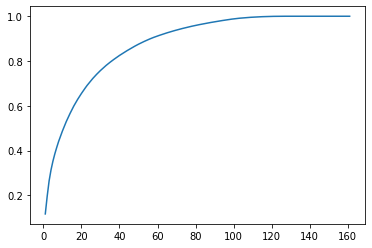

In [76]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)

While we could have taken the 100 top contributing features, because the data already has just 8% of minority class, we can't miss out on even a small amount of information as it could be vital to those 8% minority class. Hence will be going with 120 variables

In [77]:
pc2 = PCA(n_components=120, random_state=42)

In [78]:
newdata = pc2.fit_transform(x)

In [79]:
newdata.shape

(29830, 120)

In [80]:
cols = list(map(lambda x:"PC"+str(x),range(1,121)))

In [81]:
df = pd.DataFrame(newdata, columns=cols)
df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.698888  6.177418 -1.193456  5.684118  1.837928  4.489923  3.730326   
1 -0.221963 -3.010791 -0.142213 -2.261446 -0.681817  0.080602  1.501221   
2 -1.456454  1.341730 -0.512258 -0.482633  5.486085 -0.595897  1.118785   
3 -1.999467 -0.989091 -2.617977  0.964902  1.005601 -0.294487 -0.480616   
4 -3.272207 -3.536141 -0.503142  0.787379 -0.542900 -1.451454  0.148599   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  2.533494 -3.530319  4.166342 -0.652180 -0.462972 -0.580861 -0.757824   
1 -1.243997 -0.074026 -0.782149  0.329599  0.974952  0.480822  0.045582   
2  1.420875  0.173299 -0.972037 -0.301396  1.995258  0.226502  2.295271   
3  0.978107 -0.220426 -0.617438  0.483039  0.358015 -0.429941 -0.770797   
4  1.190816  0.677339 -0.554111  1.904284 -1.156761 -0.469000  0.134861   

       PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0  1.029110  1.109923  0.208009 -2.217698  0.970791  1.504307 -1.840276   
1 -0.194182 -0.317289  0.895986  0.844343  0.779121 -0.195321  0.314811   
2  6.109191 -1.049504 -0.038179 -0.444888  0.902127 -0.274577 -1.051672   
3 -0.123704  0.110579 -0.266319 -0.193331  0.101885  0.117385 -0.084740   
4 -0.026107 -0.692311  0.134686  0.597678  1.265464 -0.188379 -0.172437   

       PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
0  2.091724 -0.115674 -0.476711  0.361925 -0.146664 -4.606683  0.913427   
1 -1.274065 -0.375354 -0.706155 -0.455984  1.026421 -0.044228 -0.443075   
2  2.156380 -0.051258 -0.252062 -0.193998 -0.053054 -0.074761  0.420894   
3 -0.267721  0.339763 -0.060042  0.073015  0.003298  0.131074 -0.100017   
4  0.570099 -0.074973 -0.041857 -0.017128  0.062219 -0.015460 -0.296137   

       PC29      PC30      PC31      PC32      PC33      PC34      PC35  \
0 -2.693041 -2.218252 -0.437428 -1.128819 -0.148836  0.192699  1.960554   
1  0.135816  0.503594 -0.211145 -0.169597 -0.122131  2.029521  0.045514   
2  1.350139 -0.364218 -1.284051  1.839788  1.716439  1.811530 -0.454812   
3 -0.402648  0.505657  0.169550  0.017233  0.007639 -0.363676  0.352283   
4 -0.053115 -0.187743 -0.861633  1.095202  0.123412  0.063881  0.089840   

       PC36      PC37      PC38      PC39      PC40      PC41      PC42  \
0 -0.620535 -0.218039 -1.641130  2.501451  2.385449 -0.841622 -0.546359   
1 -0.054304 -0.031518 -0.961913  0.456855  0.142052 -0.421443 -1.170727   
2  0.873902  1.073996 -0.227216 -1.382204 -0.644161 -0.041046 -0.169426   
3  0.471277 -0.512835  0.215603  0.013758  0.348362  0.068197 -0.887570   
4 -0.674287  0.394822 -0.080590 -0.411290  0.455146  0.618951 -0.333034   

       PC43      PC44      PC45      PC46      PC47      PC48      PC49  \
0 -1.312051 -0.589893  0.210620  1.544724  0.472837 -2.073552  0.978673   
1 -0.755151 -0.075385  0.437130  0.014710  0.979324 -0.697284 -0.448803   
2  0.931631  0.216018 -0.591539  0.242890  0.161781  0.399382 -0.755582   
3 -0.161344 -0.144862 -0.296184 -0.485655 -0.055421 -0.261215 -0.182631   
4  0.199183 -0.467004  0.377271 -1.118693  1.196698 -0.304183  0.710085   

       PC50      PC51      PC52      PC53      PC54      PC55      PC56  \
0  1.833731 -0.745535  0.414916 -0.591571 -2.095778 -0.209404 -0.238863   
1 -0.974442  0.519444 -0.700566 -0.374386 -0.440093  2.114254  0.628831   
2  0.742090 -1.964544  0.511547 -1.515201  0.654109  0.802670 -0.380816   
3  0.618188  0.180251  0.158360  0.290909 -0.200207 -0.090286 -0.096047   
4 -0.246086  0.198573  0.094061  0.197556 -0.075486 -0.152448 -0.085469   

       PC57      PC58      PC59      PC60      PC61      PC62      PC63  \
0 -0.581816 -0.232544 -0.248020 -1.377400  3.974082  0.138382 -1.999247   
1 -1.359706 -0.285399  0.172692  0.015285  0.070288 -0.297263  0.394988   
2 -0.761560  2.144773  1.433793 -0.580188  0.065473 -0.929471  0.213843   
3 -0.108028 -0.442576 -0.207834  0.105328 -0.559761  0.109586  0.105548   
4 -0.137845  0.168814 -0.

In [82]:
df_final = pd.concat([df, y], axis=1)

In [83]:
df_final.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.698888  6.177418 -1.193456  5.684118  1.837928  4.489923  3.730326   
1 -0.221963 -3.010791 -0.142213 -2.261446 -0.681817  0.080602  1.501221   
2 -1.456454  1.341730 -0.512258 -0.482633  5.486085 -0.595897  1.118785   
3 -1.999467 -0.989091 -2.617977  0.964902  1.005601 -0.294487 -0.480616   
4 -3.272207 -3.536141 -0.503142  0.787379 -0.542900 -1.451454  0.148599   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  2.533494 -3.530319  4.166342 -0.652180 -0.462972 -0.580861 -0.757824   
1 -1.243997 -0.074026 -0.782149  0.329599  0.974952  0.480822  0.045582   
2  1.420875  0.173299 -0.972037 -0.301396  1.995258  0.226502  2.295271   
3  0.978107 -0.220426 -0.617438  0.483039  0.358015 -0.429941 -0.770797   
4  1.190816  0.677339 -0.554111  1.904284 -1.156761 -0.469000  0.134861   

       PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0  1.029110  1.109923  0.208009 -2.217698  0.970791  1.504307 -1.840276   
1 -0.194182 -0.317289  0.895986  0.844343  0.779121 -0.195321  0.314811   
2  6.109191 -1.049504 -0.038179 -0.444888  0.902127 -0.274577 -1.051672   
3 -0.123704  0.110579 -0.266319 -0.193331  0.101885  0.117385 -0.084740   
4 -0.026107 -0.692311  0.134686  0.597678  1.265464 -0.188379 -0.172437   

       PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
0  2.091724 -0.115674 -0.476711  0.361925 -0.146664 -4.606683  0.913427   
1 -1.274065 -0.375354 -0.706155 -0.455984  1.026421 -0.044228 -0.443075   
2  2.156380 -0.051258 -0.252062 -0.193998 -0.053054 -0.074761  0.420894   
3 -0.267721  0.339763 -0.060042  0.073015  0.003298  0.131074 -0.100017   
4  0.570099 -0.074973 -0.041857 -0.017128  0.062219 -0.015460 -0.296137   

       PC29      PC30      PC31      PC32      PC33      PC34      PC35  \
0 -2.693041 -2.218252 -0.437428 -1.128819 -0.148836  0.192699  1.960554   
1  0.135816  0.503594 -0.211145 -0.169597 -0.122131  2.029521  0.045514   
2  1.350139 -0.364218 -1.284051  1.839788  1.716439  1.811530 -0.454812   
3 -0.402648  0.505657  0.169550  0.017233  0.007639 -0.363676  0.352283   
4 -0.053115 -0.187743 -0.861633  1.095202  0.123412  0.063881  0.089840   

       PC36      PC37      PC38      PC39      PC40      PC41      PC42  \
0 -0.620535 -0.218039 -1.641130  2.501451  2.385449 -0.841622 -0.546359   
1 -0.054304 -0.031518 -0.961913  0.456855  0.142052 -0.421443 -1.170727   
2  0.873902  1.073996 -0.227216 -1.382204 -0.644161 -0.041046 -0.169426   
3  0.471277 -0.512835  0.215603  0.013758  0.348362  0.068197 -0.887570   
4 -0.674287  0.394822 -0.080590 -0.411290  0.455146  0.618951 -0.333034   

       PC43      PC44      PC45      PC46      PC47      PC48      PC49  \
0 -1.312051 -0.589893  0.210620  1.544724  0.472837 -2.073552  0.978673   
1 -0.755151 -0.075385  0.437130  0.014710  0.979324 -0.697284 -0.448803   
2  0.931631  0.216018 -0.591539  0.242890  0.161781  0.399382 -0.755582   
3 -0.161344 -0.144862 -0.296184 -0.485655 -0.055421 -0.261215 -0.182631   
4  0.199183 -0.467004  0.377271 -1.118693  1.196698 -0.304183  0.710085   

       PC50      PC51      PC52      PC53      PC54      PC55      PC56  \
0  1.833731 -0.745535  0.414916 -0.591571 -2.095778 -0.209404 -0.238863   
1 -0.974442  0.519444 -0.700566 -0.374386 -0.440093  2.114254  0.628831   
2  0.742090 -1.964544  0.511547 -1.515201  0.654109  0.802670 -0.380816   
3  0.618188  0.180251  0.158360  0.290909 -0.200207 -0.090286 -0.096047   
4 -0.246086  0.198573  0.094061  0.197556 -0.075486 -0.152448 -0.085469   

       PC57      PC58      PC59      PC60      PC61      PC62      PC63  \
0 -0.581816 -0.232544 -0.248020 -1.377400  3.974082  0.138382 -1.999247   
1 -1.359706 -0.285399  0.172692  0.015285  0.070288 -0.297263  0.394988   
2 -0.761560  2.144773  1.433793 -0.580188  0.065473 -0.929471  0.213843   
3 -0.108028 -0.442576 -0.207834  0.105328 -0.559761  0.109586  0.105548   
4 -0.137845  0.168814 -0.

### Applying Decision Tree over it!

In [84]:
# Putting feature variable to X
X = df_final.drop('churn',axis=1)

# Putting response variable to y
y = df_final['churn']

In [85]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
X_train.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
25709  8.647984 -4.980311  0.664990  3.841832 -0.451805 -1.634813 -0.750259   
6576  -3.381677 -0.683495  1.862147 -0.557980 -0.405457 -2.089827  0.281258   
10456 -2.036346  0.023443 -2.464224  0.438902 -1.721079 -0.071155 -0.521279   
5475   5.215941  0.157665 -2.559928 -3.745135 -0.051259 -1.545878  0.237448   
29273 -0.658510  4.619097 -5.885898 -1.594076  1.247631 -0.547181 -1.993788   

            PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
25709 -1.275050  0.349136 -0.135861 -0.676577  1.471817  0.265022  0.133761   
6576   1.182849  1.600338  0.784806 -0.283323  0.415103  0.944854 -0.578772   
10456  0.465428 -1.104741 -0.768189 -0.174887  1.315373 -0.099454 -0.314648   
5475   0.368287  2.389768 -0.585429 -0.652198 -1.130231 -1.188653  2.316146   
29273  1.569918  2.206010  4.156663 -1.726142 -1.378041  0.275208  0.590192   

           PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
25709 -0.249284  0.016297  1.076613 -0.118351  1.478389  0.003837 -0.085729   
6576  -0.540782 -1.567090  0.295593  0.949824 -0.322324  0.129062  0.552402   
10456 -0.058923 -0.362431 -0.226292  0.280387 -0.155405  0.093742  0.222974   
5475  -1.450032  3.708298  0.894629 -1.841187 -0.352637  0.776534  1.161813   
29273 -1.246556  0.250441  2.072293  3.203699 -1.155777  0.316530 -2.139837   

           PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
25709 -0.449663 -0.031779 -0.540002  0.243060 -0.197140  0.362353  0.042514   
6576   0.678009 -0.582239  0.075011 -0.193667 -0.237721 -0.809550 -0.497889   
10456  0.488332  0.251035 -0.057244  0.151715  0.045792 -0.139634 -0.866431   
5475   0.875338  0.981485  0.286660  0.021501  0.823096 -0.620712 -0.820779   
29273 -0.828719  0.249217 -0.251001  0.494565 -0.746573 -1.213790  0.869165   

           PC29      PC30      PC31      PC32      PC33      PC34      PC35  \
25709 -0.439151  0.313103 -0.415639  0.633213  0.934010 -1.334206  0.030988   
6576  -0.806174 -0.785991 -0.409555 -0.398982 -0.146001 -0.001752 -0.350272   
10456  0.103943 -0.064944 -0.073618  0.812643  0.511249  0.020280  0.068728   
5475   0.781487 -0.238561  0.849030  1.360909  0.776596 -0.822496 -0.755151   
29273 -0.511248  0.000789  1.069266  0.378840 -0.426854 -0.011458 -0.604009   

           PC36      PC37      PC38      PC39      PC40      PC41      PC42  \
25709 -0.254318 -0.892382 -2.462818  0.697586 -0.864715  0.322931 -0.397233   
6576   0.608350 -0.127029 -0.127180 -0.233613 -0.077320  0.183901 -0.255283   
10456 -0.185609  0.859572 -0.191690 -0.187688  0.184217 -0.200242  1.363244   
5475  -1.179205 -0.302429 -0.558914 -0.484180  0.569385 -0.236250 -0.549740   
29273 -0.194236  0.000352 -0.085076 -0.525812  0.487595  0.494689 -0.109978   

           PC43      PC44      PC45      PC46      PC47      PC48      PC49  \
25709 -0.570884 -0.521588 -0.207751  0.143622 -0.277155  0.447894  0.580524   
6576   0.227186 -0.085906  0.101830  0.248413 -0.122826  0.216837  0.050520   
10456  0.466368  0.470281 -0.047370  0.132373 -0.262200  0.118240  0.037199   
5475  -1.499711  0.194171  1.235694  0.977519  1.037226  0.623838 -1.465693   
29273  0.333274 -0.522737  0.526133 -0.382461 -0.384547  0.246609 -0.250793   

           PC50      PC51      PC52      PC53      PC54      PC55      PC56  \
25709 -0.832396  0.023652 -0.031862  0.000398  0.566617 -0.029281 -0.013806   
6576  -0.300122  0.376651 -0.106711  0.318683  0.028750 -0.020164 -0.100157   
10456 -0.130171 -0.040863  0.016370  0.079475  0.011735 -0.009565  0.162735   
5475   0.136017  0.365109 -0.096446  0.474413  0.752349  0.165972  0.436520   
29273  0.276635 -1.264462 -0.860876 -0.195106  0.180435 -0.039938  0.069193   

           PC57      PC58      PC59      PC60      PC61      PC62      PC63  \
25709  0.323958 -0.009420  0.147607  0.648040 -0.866749 -0.332915  0.221507   
6576   0.121213 -0.050528 -0.219089 -0.020453  0.05498

In [86]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [87]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      8208
           1       0.48      0.28      0.35       741

    accuracy                           0.92      8949
   macro avg       0.71      0.63      0.65      8949
weighted avg       0.90      0.92      0.91      8949



We are interested in the recall associated with class 1 i.e. the churners. Here a recall of 0.28 is really bad. Lets try to tune the decision tree and see if we can improve this metric

In [88]:
# GridSearchCV to find optimal max_depth

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True,verbose=1,n_jobs=4)
tree.fit(X_train, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   39.5s
[Parallel(n_jobs=4)]: Done  95 out of  95 | elapsed:  2.3min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100), n_jobs=4,
             param_grid={'max_depth': range(1, 20)}, return_train_score=True,
             scoring='accuracy', verbose=1)

In [89]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.000125      0.075969         0.042686        0.033254   
1       1.600917      0.189782         0.011569        0.002054   
2       2.127310      0.089142         0.010571        0.000798   
3       2.729698      0.218677         0.010572        0.002239   
4       3.102501      0.152152         0.018550        0.009369   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.914771           0.914990   
1               2  {'max_depth': 2}           0.914771           0.914990   
2               3  {'max_depth': 3}           0.912856           0.914990   
3               4  {'max_depth': 4}           0.916687           0.916667   
4               5  {'max_depth': 5}           0.915729           0.912835   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.914990           0.914990           0.914990         0.914947   
1           0.914990           0.914990           0.914990         0.914947   
2           0.916667           0.913554           0.915948         0.914803   
3           0.915948           0.917146           0.914511         0.916192   
4           0.915948           0.919780           0.914272         0.915713   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.000088                3            0.914990            0.914936   
1        0.000088                3            0.914990            0.914936   
2        0.001426                5            0.915769            0.914936   
3        0.000923                1            0.918942            0.918647   
4        0.002322                2            0.924749            0.921341   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.914936            0.914936            0.914936   
1            0.914936            0.914936            0.914936   
2            0.918707            0.917809            0.916911   
3            0.919126            0.918348            0.918767   
4            0.925711            0.924753            0.925711   

   mean_train_score  std_train_score  
0          0.914947         0.000022  
1          0.914947         0.000022  
2          0.916826         0.001357  
3          0.918766         0.000264  
4          0.924453         0.001614

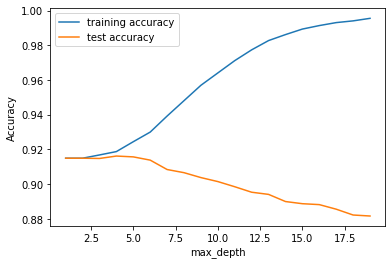

In [90]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


The max depth around 4 is good. After that the model overfits and hence gives bad results on the test set

In [91]:
# GridSearchCV to find optimal min_samples_leaf

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True,verbose=1,n_jobs=5)
tree.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   58.3s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:  1.1min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100), n_jobs=5,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [92]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      10.818022      0.769616         0.016157        0.008885   
1       8.218244      0.809647         0.011968        0.003026   
2       7.399872      0.633743         0.011103        0.002346   
3       5.949135      0.084867         0.018880        0.015904   
4       5.812946      0.115213         0.011170        0.002631   

  param_min_samples_leaf                    params  split0_test_score  \
0                      5   {'min_samples_leaf': 5}           0.891549   
1                     25  {'min_samples_leaf': 25}           0.907829   
2                     45  {'min_samples_leaf': 45}           0.913814   
3                     65  {'min_samples_leaf': 65}           0.914532   
4                     85  {'min_samples_leaf': 85}           0.919320   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.887213           0.896312           0.895833           0.894157   
1           0.907328           0.909722           0.911877           0.913554   
2           0.908525           0.919301           0.913314           0.914751   
3           0.914272           0.918103           0.910920           0.915230   
4           0.914033           0.919301           0.914751           0.913793   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.893013        0.003345               10            0.970726   
1         0.910062        0.002369                9            0.937201   
2         0.913941        0.003439                8            0.929119   
3         0.914611        0.002295                7            0.926006   
4         0.916239        0.002527                6            0.924808   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.970428            0.968931            0.968991   
1            0.936486            0.936366            0.937324   
2            0.929841            0.929243            0.931098   
3            0.928105            0.927686            0.927327   
4            0.926010            0.926250            0.924633   

   split4_train_score  mean_train_score  std_train_score  
0            0.968632          0.969542         0.000859  
1            0.935349          0.936545         0.000708  
2            0.931158          0.930092         0.000881  
3            0.926429          0.927111         0.000781  
4            0.925591          0.925459         0.000641

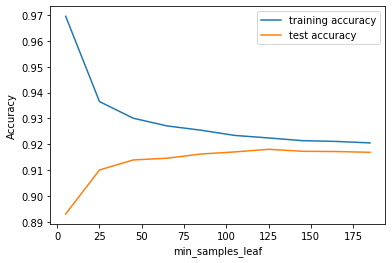

In [93]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Min samples leaf of 100 is a good number. Anything below that will lead to overfitting

In [94]:
# GridSearchCV to find optimal min_samples_split

# parameters to build the model on
parameters = {'min_samples_split': range(5, 300, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True,verbose=1,n_jobs=5)
tree.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  1.6min
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:  2.9min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100), n_jobs=5,
             param_grid={'min_samples_split': range(5, 300, 20)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [95]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      10.583730      0.627944         0.010641        0.001164   
1      10.512331      0.595681         0.016755        0.008726   
2      10.400581      0.575122         0.011171        0.007448   
3      10.826932      0.988180         0.031317        0.016027   
4      13.071610      0.752692         0.014162        0.006921   

  param_min_samples_split                     params  split0_test_score  \
0                       5   {'min_samples_split': 5}           0.881973   
1                      25  {'min_samples_split': 25}           0.893704   
2                      45  {'min_samples_split': 45}           0.900646   
3                      65  {'min_samples_split': 65}           0.901604   
4                      85  {'min_samples_split': 85}           0.904477   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.870929           0.880987           0.880268           0.882663   
1           0.880747           0.887692           0.893439           0.888170   
2           0.885776           0.893678           0.903736           0.894157   
3           0.888889           0.900862           0.905651           0.900383   
4           0.891044           0.905172           0.907567           0.903975   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.879364        0.004296               15            0.993954   
1         0.888750        0.004733               14            0.965278   
2         0.895599        0.006228               13            0.953305   
3         0.899478        0.005612               12            0.946300   
4         0.902447        0.005833               11            0.939955   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.994732            0.994074            0.993595   
1            0.963125            0.965579            0.965819   
2            0.952948            0.954265            0.952409   
3            0.945944            0.948459            0.945884   
4            0.940377            0.943011            0.941335   

   split4_train_score  mean_train_score  std_train_score  
0            0.994193          0.994109         0.000370  
1            0.966597          0.965279         0.001163  
2            0.953128          0.953211         0.000606  
3            0.946663          0.946650         0.000946  
4            0.941275          0.941191         0.001052

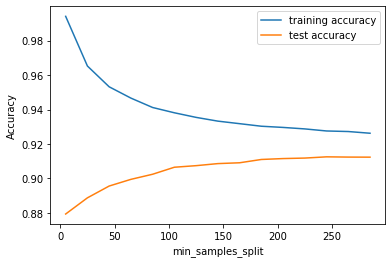

In [96]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


A minimum samples of 200 seems optimum

In [97]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(2, 8, 2),
    'min_samples_leaf': range(70, 120, 20),
    'min_samples_split': range(50, 250, 50),
    'criterion': ["entropy", "gini"]
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 2,n_jobs=5)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:   18.7s
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:  2.2min
[Parallel(n_jobs=5)]: Done 360 out of 360 | elapsed:  4.4min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=5,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(2, 8, 2),
                         'min_samples_leaf': range(70, 120, 20),
                         'min_samples_split': range(50, 250, 50)},
             verbose=2)

In [98]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9176761745812912
DecisionTreeClassifier(max_depth=6, min_samples_leaf=90, min_samples_split=200)


In [99]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=90,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=90, min_samples_split=50,
                       random_state=100)

In [100]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      8208
           1       0.56      0.14      0.22       741

    accuracy                           0.92      8949
   macro avg       0.74      0.56      0.59      8949
weighted avg       0.90      0.92      0.90      8949



#### Although the recall and accuracy have increased, it is not good enough. Lets handle the class imbalance and then see if there is any improvement

### Handling Class Imbalance - Upsampling Minority Class using Random Resampling

This technique simply copy pastes the minority class data points. This technique is to applied only on the training data and test data is not to be touched. This technique would lead to <b>some amount of overfitting when we use GridSearchCV</b> as the test data split might have same data points which were there in training data split <b>but testing the model on test data will not be affected.</b>

In [101]:
from sklearn.utils import resample

In [102]:
y = high_valued['churn']
X = high_valued.drop('churn', axis=1)

In [103]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [104]:
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

In [105]:
# separate minority and majority classes
not_churn = X[X.churn==0]
churn = X[X.churn==1]

In [106]:
# upsample minority
churn_upsampled = resample(churn,
                          replace=True, # sample with replacement
                          n_samples=len(not_churn), # match number in majority class
                          random_state=27) # reproducible results

In [107]:
# combine majority and upsampled minority
upsampled = pd.concat([not_churn, churn_upsampled])

In [108]:
upsampled.churn.value_counts()

1    20497
0    20497
Name: churn, dtype: int64

#### Now we have equal number of churn and non churn samples in out dataset

In [109]:
y_train_new = upsampled['churn']
X_train_new = upsampled.drop('churn',axis=1)

In [110]:
# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train_new, y_train_new)

DecisionTreeClassifier(max_depth=5)

In [111]:
# Let's check the evaluation metrics of our default model

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      6816
           1       0.39      0.83      0.53       642

    accuracy                           0.87      7458
   macro avg       0.68      0.85      0.73      7458
weighted avg       0.93      0.87      0.89      7458



### Recall has drastically improved from somewhere around 0.14 to 0.83! 

P.S. - The model comparison might not be that straightforward as the model used before was after applying PCA, while this model has been made on the original dataset. Still such a high increase in recall should be attributed to the handling of the minority class imbalance

### Tuning the model to get better results - 

In [112]:
# parameters to build the model on
parameters = {'max_depth': range(1, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True,verbose=1,n_jobs=4)
tree.fit(X_train_new, y_train_new)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   29.8s
[Parallel(n_jobs=4)]: Done  95 out of  95 | elapsed:  1.8min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100), n_jobs=4,
             param_grid={'max_depth': range(1, 20)}, return_train_score=True,
             scoring='accuracy', verbose=1)

In [113]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.745088      0.022931         0.037492        0.007654   
1       1.263946      0.018517         0.029540        0.008074   
2       1.651892      0.065123         0.029250        0.007159   
3       2.099677      0.058475         0.030719        0.002476   
4       2.684170      0.106335         0.033576        0.006237   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.774973           0.779973   
1               2  {'max_depth': 2}           0.793511           0.794853   
2               3  {'max_depth': 3}           0.822295           0.818880   
3               4  {'max_depth': 4}           0.845957           0.852909   
4               5  {'max_depth': 5}           0.864618           0.870106   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.781925           0.777412           0.771408         0.777138   
1           0.801195           0.797780           0.790071         0.795482   
2           0.823881           0.821808           0.821542         0.821681   
3           0.855104           0.850226           0.847158         0.850271   
4           0.875839           0.871692           0.867285         0.869908   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.003703               19            0.777741            0.776490   
1        0.003781               18            0.795884            0.795701   
2        0.001618               17            0.823906            0.823815   
3        0.003424               16            0.850069            0.853941   
4        0.003828               15            0.872907            0.873914   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.776002            0.777131            0.778632   
1            0.794115            0.794969            0.796896   
2            0.821863            0.824424            0.824430   
3            0.846105            0.850099            0.851903   
4            0.877146            0.875133            0.874436   

   mean_train_score  std_train_score  
0          0.777199         0.000926  
1          0.795513         0.000931  
2          0.823688         0.000947  
3          0.850423         0.002586  
4          0.874707         0.001419

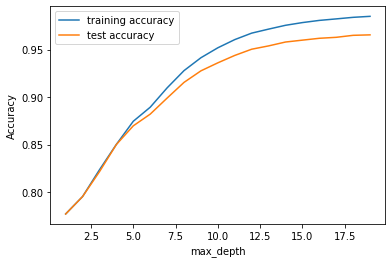

In [114]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### Usually with increasing max_depth the test accuracy decreases due to overfitting but here as we had oversampled the training data with the exact same data points, the test data is not entirely unknown and may have the exact same data points from the training set. Hence on of the downsides of a simple resampling is that the results of GridSearchCV can't be trusted

In [115]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(2, 8, 2),
    'min_samples_leaf': range(70, 120, 20),
    'min_samples_split': range(50, 250, 50),
    'criterion': ["entropy", "gini"]
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 2,n_jobs=5)

# Fit the grid search to the data
grid_search.fit(X_train_new,y_train_new)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:   15.0s
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:  1.8min
[Parallel(n_jobs=5)]: Done 360 out of 360 | elapsed:  3.9min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=5,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(2, 8, 2),
                         'min_samples_leaf': range(70, 120, 20),
                         'min_samples_split': range(50, 250, 50)},
             verbose=2)

In [116]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8755670285212309
DecisionTreeClassifier(max_depth=6, min_samples_leaf=70, min_samples_split=50)


In [117]:
# model with optimal hyperparameters - max_depth=5 gives the best recall
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=6, 
                                  min_samples_leaf=70,
                                  min_samples_split=50)
clf_gini.fit(X_train_new, y_train_new)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=70, min_samples_split=50,
                       random_state=100)

In [118]:
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      6816
           1       0.40      0.82      0.54       642

    accuracy                           0.88      7458
   macro avg       0.69      0.85      0.73      7458
weighted avg       0.93      0.88      0.90      7458



### While the precision is low, the recall is good. We have compromised on accuracy to get a better recall value. We are okay with false positives, but cannot miss churners!

In [119]:
#clf_gini.feature_importances_

In [120]:
feature_imp_list=[]

for feat, importance in zip(X_train_new.columns, clf_gini.feature_importances_):  
    temp = [feat, importance*100]
    feature_imp_list.append(temp)

fT_df = pd.DataFrame(feature_imp_list, columns = ['Feature', 'Importance'])
print (fT_df.sort_values('Importance', ascending = False))

                 Feature  Importance
71          loc_ic_mou_8   51.059200
17         roam_og_mou_8   10.833101
160  days_since_recharge    9.514769
89        total_ic_mou_8    7.367696
110   last_day_rch_amt_8    6.089391
100     total_rech_num_7    2.824637
105       max_rech_amt_6    2.520466
16         roam_og_mou_7    2.080135
131          vol_3g_mb_8    1.421916
14         roam_ic_mou_8    0.772438
46          std_og_mou_7    0.685780
125   av_rech_amt_data_8    0.658522
53          spl_og_mou_8    0.523950
116      max_rech_data_8    0.474816
80      std_ic_t2f_mou_8    0.451753
107       max_rech_amt_8    0.436078
127          vol_2g_mb_7    0.374684
59        total_og_mou_8    0.304395
60      loc_ic_t2t_mou_6    0.293822
68      loc_ic_t2f_mou_8    0.270466
156                  aon    0.256944
13         roam_ic_mou_7    0.256797
32          loc_og_mou_8    0.140507
157           aug_vbc_3g    0.124536
3                 arpu_6    0.084645
8            onnet_mou_8    0.077258
1

In [121]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[6014  802]
 [ 113  529]]


### Lets print out the decision tree to see the most significant predictor variables - 

In [122]:
#import os
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/release/bin/'

<b>You would need to downgrade to version 0.20.3 of sklearn to be able to use 'sklearn.externals.six'</b> If I downgrade to it, the imbalance class used for SMOTE won't work and so <b>I am attaching the jpeg of the decision tree</b> I had obtained and commenting out the code. One may downgrade the version of sklearn and run the code. I have commented the code which had the jpeg attachment as I could not submit the jpeg with the assignment

In [123]:
# Importing required packages for visualization
#from IPython.display import Image  
#from sklearn.externals.six import StringIO  
#from sklearn.tree import export_graphviz
#import pydotplus, graphviz

# Putting features
#features = list(X_train_new.columns)
#features

In [124]:
# plotting tree with max_depth=3
#import graphviz 
#dot_data = StringIO()  
#export_graphviz(clf_gini, out_file=dot_data,
#                feature_names=features, filled=True,rounded=True)

#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())

In [363]:
# Attached png
# ![decision_tree_2.png](attachment:decision_tree_2.png)

### Lets use Logistic Regression Now

In [125]:
upsampled.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6   arpu_7  \
20224             0.0             0.0             0.0  320.970  377.613   
19333             0.0             0.0             0.0  598.736  533.547   
4104              0.0             0.0             0.0  854.269  705.393   
23783             0.0             0.0             0.0  562.455  227.759   
8293              0.0             0.0             0.0  623.888  719.512   

        arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
20224  393.227         5.71        88.43        10.43        264.68   
19333  509.522       115.74         0.59         1.43        876.43   
4104   651.353      1131.23      1418.14      1472.38         52.59   
23783  586.181       361.38        85.98       145.49        190.28   
8293   948.848        43.31       106.34        84.06       1196.81   

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
20224        208.79        302.71           0.00           0.00   
19333        894.69        824.86           0.00           0.00   
4104          22.21         49.19          16.54           3.11   
23783         69.31        426.51          52.86         104.58   
8293        1124.96       1455.04           0.00           0.00   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
20224           0.00           0.00           0.00           0.00   
19333           0.00           0.00           0.00           0.00   
4104            0.00        1146.59         141.45           0.00   
23783          89.16         193.11         155.29         141.76   
8293            0.00           0.00           0.00           0.00   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
20224              5.13             83.86             10.43            260.98   
19333              1.45              0.59              1.43             13.88   
4104               0.16             10.91              9.18              1.88   
23783             33.64              0.00             44.74             79.88   
8293              35.99             69.91             83.51            372.28   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
20224            205.54            291.31              0.00              1.46   
19333             34.06             14.03              3.48              0.00   
4104              15.46              8.81              0.00              0.00   
23783              0.00             92.96              2.38              0.00   
8293             247.64            243.69              0.00              0.00   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
20224              3.98              3.69              1.41              4.71   
19333              4.31              2.23              2.56              6.84   
4104               0.00             11.03              0.00              0.63   
23783              6.78              0.00              0.00              0.00   
8293               0.00              0.00              0.16              2.21   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
20224        266.11        290.88        305.73              0.58   
19333         18.81         34.66         19.78            114.29   
4104           2.05         26.38         17.99             35.18   
23783        115.91          0.00        144.49            224.08   
8293         408.28        317.56        327.21              7.31   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
20224              4.56              0.00              0.00              0.36   
19333              0.00              0.00            856.83            857.63   
4104            1269.78           1463.19              0.00              1.11   
23783              0.00             22.84             18.54              0.00   
8293              36.43       

In [126]:
upsampled_churn = upsampled['churn']
upsampled_to_scale = upsampled.drop('churn',axis=1)

<b>Scaling the data to use Logistic Regression on it</b>

In [127]:
from sklearn.preprocessing import MinMaxScaler

In [128]:
scaler = MinMaxScaler()

In [129]:
upsampled_scaled = scaler.fit_transform(upsampled_to_scale)

In [130]:
upsampled_scaled = pd.DataFrame(upsampled_scaled,columns=upsampled_to_scale.columns)

In [131]:
upsampled_scaled.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0             0.0             0.0             0.0  0.011574  0.010744   
1             0.0             0.0             0.0  0.021591  0.015181   
2             0.0             0.0             0.0  0.030805  0.020070   
3             0.0             0.0             0.0  0.020282  0.006480   
4             0.0             0.0             0.0  0.022498  0.020472   

     arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0  0.011723     0.000774     0.011037     0.000970      0.040196   
1  0.015190     0.015690     0.000074     0.000133      0.133101   
2  0.019418     0.153352     0.177004     0.136933      0.007987   
3  0.017475     0.048989     0.010732     0.013531      0.028897   
4  0.028287     0.005871     0.013273     0.007818      0.181756   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0      0.025106      0.021611       0.000000       0.000000        0.00000   
1      0.107582      0.058888       0.000000       0.000000        0.00000   
2      0.002671      0.003512       0.008693       0.001081        0.00000   
3      0.008334      0.030449       0.027781       0.036350        0.03348   
4      0.135271      0.103877       0.000000       0.000000        0.00000   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0       0.000000       0.000000        0.00000          0.000798   
1       0.000000       0.000000        0.00000          0.000225   
2       0.362640       0.074445        0.00000          0.000025   
3       0.061076       0.081729        0.04058          0.005231   
4       0.000000       0.000000        0.00000          0.005596   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0          0.011331          0.000970          0.055179          0.045103   
1          0.000080          0.000133          0.002935          0.007474   
2          0.001474          0.000854          0.000397          0.003392   
3          0.000000          0.004161          0.016889          0.000000   
4          0.009446          0.007767          0.078710          0.054341   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0          0.058716          0.000000           0.00122          0.004287   
1          0.002828          0.002374           0.00000          0.004642   
2          0.001776          0.000000           0.00000          0.000000   
3          0.018737          0.001623           0.00000          0.007302   
4          0.049118          0.000000           0.00000          0.000000   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0          0.010978          0.002475          0.013387      0.025002   
1          0.006634          0.004494          0.019441      0.001767   
2          0.032815          0.000000          0.001791      0.000193   
3          0.000000          0.000000          0.000000      0.010890   
4          0.000000          0.000281          0.006281      0.038360   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0      0.037901      0.027693          0.000079          0.000571   
1      0.004516      0.001792          0.015515          0.000000   
2      0.003437      0.001630          0.004776          0.159057   
3      0.000000      0.013088          0.030418          0.000000   
4      0.041377      0.029639          0.000992          0.004563   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0          0.000000          0.000000          0.000044          0.000194   
1          0.000000          0.139328          0.103681          0.057323   
2          0.182569          0.000000          0.000134          0.002646   
3          0.002850          0.003015          0.000000          0.018845   
4          0.000069          0.134076          0.106040          0.086676   

   std_og_t2f_mou_6  std_og_t2f_mo

In [132]:
from sklearn.linear_model import LogisticRegression

####  I had initially tried using RFECV to select the best number of columns to select using RFE.

In [133]:
from sklearn.feature_selection import RFECV

In [134]:
logReg = LogisticRegression()

In [135]:
rfecv = RFECV(estimator=logReg,scoring='roc_auc',cv=5,verbose=2,n_jobs=4,step=5)

In [136]:
rfecv = rfecv.fit(upsampled_scaled,upsampled_churn)

Fitting estimator with 161 features.
Fitting estimator with 156 features.


In [137]:
list(zip(upsampled_scaled.columns,rfecv.ranking_))

[('loc_og_t2o_mou', 3),
 ('std_og_t2o_mou', 2),
 ('loc_ic_t2o_mou', 2),
 ('arpu_6', 1),
 ('arpu_7', 1),
 ('arpu_8', 1),
 ('onnet_mou_6', 1),
 ('onnet_mou_7', 1),
 ('onnet_mou_8', 1),
 ('offnet_mou_6', 1),
 ('offnet_mou_7', 1),
 ('offnet_mou_8', 1),
 ('roam_ic_mou_6', 1),
 ('roam_ic_mou_7', 1),
 ('roam_ic_mou_8', 1),
 ('roam_og_mou_6', 1),
 ('roam_og_mou_7', 1),
 ('roam_og_mou_8', 1),
 ('loc_og_t2t_mou_6', 1),
 ('loc_og_t2t_mou_7', 1),
 ('loc_og_t2t_mou_8', 1),
 ('loc_og_t2m_mou_6', 1),
 ('loc_og_t2m_mou_7', 1),
 ('loc_og_t2m_mou_8', 1),
 ('loc_og_t2f_mou_6', 1),
 ('loc_og_t2f_mou_7', 1),
 ('loc_og_t2f_mou_8', 1),
 ('loc_og_t2c_mou_6', 1),
 ('loc_og_t2c_mou_7', 1),
 ('loc_og_t2c_mou_8', 1),
 ('loc_og_mou_6', 1),
 ('loc_og_mou_7', 1),
 ('loc_og_mou_8', 1),
 ('std_og_t2t_mou_6', 1),
 ('std_og_t2t_mou_7', 1),
 ('std_og_t2t_mou_8', 1),
 ('std_og_t2m_mou_6', 1),
 ('std_og_t2m_mou_7', 1),
 ('std_og_t2m_mou_8', 1),
 ('std_og_t2f_mou_6', 1),
 ('std_og_t2f_mou_7', 1),
 ('std_og_t2f_mou_8', 1),
 

In [138]:
sum(rfecv.support_)

151

In [139]:
# RFECV had selected the above number of features

In [140]:
upsampled_scaled_train = upsampled_scaled[upsampled_scaled.columns[rfecv.support_]]

In [141]:
X_test_scaled = scaler.transform(X_test)

In [142]:
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [143]:
X_test_rfe = X_test_scaled[X_test_scaled.columns[rfecv.support_]]

In [144]:
logRegRfe = LogisticRegression()

In [145]:
logRegRfe.fit(upsampled_scaled_train,upsampled_churn)

LogisticRegression()

In [146]:
y_pred_logreg = logRegRfe.predict(X_test_rfe)

In [147]:
y_pred_logreg

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [148]:
print(classification_report(y_test,y_pred_logreg))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90      6816
           1       0.33      0.84      0.47       642

    accuracy                           0.84      7458
   macro avg       0.65      0.84      0.69      7458
weighted avg       0.93      0.84      0.87      7458



In [149]:
print(confusion_matrix(y_test,y_pred_logreg))

[[5706 1110]
 [ 103  539]]


<b>The recall value is good.</b>

### Using statsmodel.api for Logistic Regression so that I can manually set the threshold value and increase recall

In [150]:
import statsmodels.api as sm

In [151]:
upsampled_train_sm = sm.add_constant(upsampled_scaled_train)

In [152]:
# Logistic regression model
logm1 = sm.GLM(list(upsampled_churn),upsampled_train_sm, family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                40994
Model:                            GLM   Df Residuals:                    40845
Model Family:                Binomial   Df Model:                          148
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15636.
Date:                Mon, 06 Jul 2020   Deviance:                       31272.
Time:                        15:56:45   Pearson chi2:                 7.15e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.9503      0.059     16.083      0.000       0.835       1.066
arpu_6                 -3.2294      4.048     -0.798      0.425     -11.164       4.705
arpu_7                 18.4685      5.609      3.293      0.001       7.476      29.461
arpu_8                 39.2858      5.437      7.226      0.000      28.630      49.942
onnet_mou_6           -60.7852     19.574     -3.105      0.002     -99.149     -22.421
onnet_mou_7           -77.6342     18.296     -4.243      0.000    -113.494     -41.775
onnet_mou_8            74.8804     27.677      2.706      0.007      20.635     129.126
offnet_mou_6          -47.8423     17.259     -2.772      0.006     -81.670     -14.015
offnet_mou_7          -79.5437     18.531     -4.293      0.000    -115.863     -43.224
offnet_mou_8           69.5601     35.286      1.971      0.049       0.401     138.719
roam_ic_mou_6           1.7847      0.569      3.138      0.002       0.670       2.899
roam_ic_mou_7           2.0432      0.841      2.431      0.015       0.396       3.691
roam_ic_mou_8          -0.8253      0.694     -1.189      0.234      -2.186       0.535
roam_og_mou_6          24.8740      8.344      2.981      0.003       8.520      41.228
roam_og_mou_7          20.1885      4.265      4.733      0.000      11.829      28.548
roam_og_mou_8         -19.8303      8.871     -2.235      0.025     -37.217      -2.444
loc_og_t2t_mou_6     3.791e+04    1.7e+04      2.224      0.026    4502.491    7.13e+04
loc_og_t2t_mou_7    -5083.0306   1.93e+04     -0.263      0.793    -4.3e+04    3.28e+04
loc_og_t2t_mou_8     2.785e+05   2.96e+04      9.399      0.000     2.2e+05    3.37e+05
loc_og_t2m_mou_6     2.787e+04   1.25e+04      2.223      0.026    3302.054    5.24e+04
loc_og_t2m_mou_7    -3134.6537   1.19e+04     -0.263      0.792   -2.65e+04    2.02e+04
loc_og_t2m_mou_8     1.285e+05   1.37e+04      9.400      0.000    1.02e+05    1.55e+05
loc_og_t2f_mou_6     8643.0768   3885.779      2.224      0.026    1027.089    1.63e+04
loc_og_t2f_mou_7     -829.1044   3124.517     -0.265      0.791   -6953.046    5294.837
loc_og_t2f_mou_8     2.405e+04   2558.689      9.401      0.000     1.9e+04    2.91e+04
loc_og_t2c_mou_6       -0.4068      0.682     -0.597      0.551      -1.743       0.929
loc_og_t2c_mou_7        3.8148      1.263      3.021      0.003       1.340       6.289
loc_og_t2c_mou_8        2.5652      1.102      2.327      0.020       0.405       4.726
loc_og_mou_6        -9.442e+04   3.47e+04     -2.724      0.006   -1.62e+05   -2.65e+04
loc_og_mou_7        -5.371e+04   2.59e+04     -2.074      0.038   -1.04e+05   -2943.322
loc_og_mou_8        -6.572e+04      4e+04     -1.643      0.100   -1.44e+05    1.27e+04
std_og_t2t_mou_6     3.382e+04   2.27e+04      1.493      0.136   -1.06e+04    7.82e+04
std

In [153]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [154]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = upsampled_train_sm.columns
vif['VIF'] = [variance_inflation_factor(upsampled_train_sm.values, i) for i in range(upsampled_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features           VIF
104    total_rech_data_7           inf
103    total_rech_data_6           inf
105    total_rech_data_8           inf
109      count_rech_2g_6           inf
110      count_rech_2g_7           inf
111      count_rech_2g_8           inf
112      count_rech_3g_6           inf
113      count_rech_3g_7           inf
114      count_rech_3g_8           inf
41          std_og_mou_7  3.284734e+10
40          std_og_mou_6  3.232117e+10
42          std_og_mou_8  2.645768e+10
53        total_og_mou_7  1.602026e+10
52        total_og_mou_6  1.304682e+10
54        total_og_mou_8  1.304047e+10
34      std_og_t2m_mou_6  1.121698e+10
35      std_og_t2m_mou_7  1.095984e+10
31      std_og_t2t_mou_6  1.091042e+10
32      std_og_t2t_mou_7  1.026921e+10
33      std_og_t2t_mou_8  8.155607e+09
36      std_og_t2m_mou_8  7.855264e+09
29          loc_og_mou_7  6.815885e+09
30          loc_og_mou_8  6.809928e+09
28          loc_og_mou_6  6.664402e+09
64          loc_ic_mou_6  5.070162e+09
65          loc_ic_mou_7  4.795183e+09
66          loc_ic_mou_8  4.583238e+09
80        total_ic_mou_7  3.844986e+09
79        total_ic_mou_6  3.691560e+09
81        total_ic_mou_8  3.327902e+09
19      loc_og_t2m_mou_6  1.961631e+09
20      loc_og_t2m_mou_7  1.771023e+09
77          std_ic_mou_7  1.589724e+09
21      loc_og_t2m_mou_8  1.585331e+09
17      loc_og_t2t_mou_7  1.565350e+09
16      loc_og_t2t_mou_6  1.529369e+09
76          std_ic_mou_6  1.521287e+09
18      loc_og_t2t_mou_8  1.502109e+09
58      loc_ic_t2m_mou_6  1.478761e+09
59      loc_ic_t2m_mou_7  1.338816e+09
60      loc_ic_t2m_mou_8  1.200755e+09
78          std_ic_mou_8  1.113860e+09
56      loc_ic_t2t_mou_7  8.341859e+08
55      loc_ic_t2t_mou_6  6.967763e+08
71      std_ic_t2m_mou_7  5.904763e+08
70      std_ic_t2m_mou_6  5.729304e+08
57      loc_ic_t2t_mou_8  5.620949e+08
72      std_ic_t2m_mou_8  3.918248e+08
68      std_ic_t2t_mou_7  3.355001e+08
67      std_ic_t2t_mou_6  3.062934e+08
69      std_ic_t2t_mou_8  2.058652e+08
86          isd_ic_mou_7  1.577532e+08
87          isd_ic_mou_8  1.219872e+08
85          isd_ic_mou_6  1.192247e+08
62      loc_ic_t2f_mou_7  6.270470e+07
44          isd_og_mou_7  5.508065e+07
43          isd_og_mou_6  5.468618e+07
45          isd_og_mou_8  5.144649e+07
61      loc_ic_t2f_mou_6  5.075483e+07
63      loc_ic_t2f_mou_8  4.563384e+07
22      loc_og_t2f_mou_6  1.694526e+07
75      std_ic_t2f_mou_8  1.657844e+07
47          spl_og_mou_7  1.614633e+07
23      loc_og_t2f_mou_7  1.585137e+07
73      std_ic_t2f_mou_6  1.458597e+07
74      std_ic_t2f_mou_7  1.414056e+07
48          spl_og_mou_8  1.252594e+07
24      loc_og_t2f_mou_8  1.112732e+07
46          spl_og_mou_6  1.102600e+07
37      std_og_t2f_mou_6  6.230410e+06
38      std_og_t2f_mou_7  5.383255e+06
39      std_og_t2f_mou_8  4.612183e+06
88           ic_others_6  3.832029e+06
89           ic_others_7  3.358433e+06
90           ic_others_8  2.877407e+06
51           og_others_8  4.387570e+05
50           og_others_7  4.249843e+05
49           og_others_6  1.341383e+05
8           offnet_mou_7  4.218250e+03
5            onnet_mou_7  4.197440e+03
6            onnet_mou_8  2.965250e+03
9           offnet_mou_8  2.897380e+03
4            onnet_mou_6  1.567250e+03
7           offnet_mou_6  1.495820e+03
82          spl_ic_mou_6  1.015120e+03
83          spl_ic_mou_7  7.027000e+02
84          spl_ic_mou_8  6.053500e+02
14         roam_og_mou_7  2.682800e+02
15         roam_og_mou_8  2.440500e+02
13         roam_og_mou_6  1.323000e+02
143          sachet_3g_7  3.878000e+01
144          sachet_3g_8  3.860000e+01
142          sachet_3g_6  3.153000e+01
96      total_rech_amt_8  2.573000e+01
3                 arpu_8  2.363000e+01
95      total_rech_amt_7  2.224000e+01
2                 arpu_7  2.079000e+01
94      total_rech_amt_6  1.887000e+01
127            arpu_2g_6  1.847000e+01
117   av_rech_amt_data_8  1.699000e+01
1                 arpu_6  1.695000e+01
0                  const  1.667000e+01

<b> From the VIF above, it can be seen that around 45 columns have a good vif, all others have very high VIF. So lets use RFE to get around 60 most significant features and then prune it down manually</b>

In [155]:
#Lets use RFE with 60 featuresa

In [156]:
logRegRFE_2 = LogisticRegression()

In [157]:
from sklearn.feature_selection import RFE
rfe = RFE(logRegRFE_2, 60)             # running RFE with 60 variables as output
rfe = rfe.fit(upsampled_scaled,upsampled_churn)

In [158]:
list(zip(upsampled_scaled.columns, rfe.support_, rfe.ranking_))

[('loc_og_t2o_mou', False, 102),
 ('std_og_t2o_mou', False, 101),
 ('loc_ic_t2o_mou', False, 100),
 ('arpu_6', True, 1),
 ('arpu_7', True, 1),
 ('arpu_8', False, 69),
 ('onnet_mou_6', True, 1),
 ('onnet_mou_7', False, 14),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 82),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', True, 1),
 ('roam_ic_mou_7', True, 1),
 ('roam_ic_mou_8', False, 52),
 ('roam_og_mou_6', False, 46),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 27),
 ('loc_og_t2t_mou_7', True, 1),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', True, 1),
 ('loc_og_t2m_mou_7', False, 91),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 78),
 ('loc_og_t2f_mou_7', False, 73),
 ('loc_og_t2f_mou_8', True, 1),
 ('loc_og_t2c_mou_6', False, 48),
 ('loc_og_t2c_mou_7', True, 1),
 ('loc_og_t2c_mou_8', False, 54),
 ('loc_og_mou_6', False, 50),
 ('loc_og_mou_7', False, 20),
 ('loc_og_mou_8', True, 1),
 (

In [159]:
upsampled_train_2 = upsampled_scaled[upsampled_scaled.columns[rfe.support_]]

In [160]:
# Logistic regression model
logm2 = sm.GLM(list(upsampled_churn),sm.add_constant(upsampled_train_2), family = sm.families.Binomial())
model = logm2.fit()

In [161]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                40994
Model:                            GLM   Df Residuals:                    40933
Model Family:                Binomial   Df Model:                           60
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16453.
Date:                Mon, 06 Jul 2020   Deviance:                       32906.
Time:                        16:00:22   Pearson chi2:                 5.45e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4658      0.045     10.455      0.000       0.378       0.553
arpu_6                  1.8270      3.352      0.545      0.586      -4.743       8.397
arpu_7                  9.3024      2.576      3.611      0.000       4.253      14.351
onnet_mou_6             1.0626      0.418      2.542      0.011       0.243       1.882
onnet_mou_8           -17.9929     17.684     -1.017      0.309     -52.653      16.667
offnet_mou_7            2.8840      0.680      4.242      0.000       1.552       4.216
offnet_mou_8          -39.1093     22.346     -1.750      0.080     -82.906       4.687
roam_ic_mou_6           2.0328      0.442      4.602      0.000       1.167       2.899
roam_ic_mou_7           1.9735      0.717      2.751      0.006       0.568       3.379
roam_og_mou_7           1.5202      0.385      3.949      0.000       0.766       2.275
roam_og_mou_8          10.7631      5.577      1.930      0.054      -0.168      21.694
loc_og_t2t_mou_7       11.1670      1.197      9.333      0.000       8.822      13.512
loc_og_t2t_mou_8     4.458e+05   2.71e+04     16.468      0.000    3.93e+05    4.99e+05
loc_og_t2m_mou_6       -2.8055      0.458     -6.124      0.000      -3.703      -1.908
loc_og_t2m_mou_8     2.057e+05   1.25e+04     16.469      0.000    1.81e+05     2.3e+05
loc_og_t2f_mou_8      3.85e+04   2337.946     16.469      0.000    3.39e+04    4.31e+04
loc_og_t2c_mou_7        2.6826      0.728      3.686      0.000       1.256       4.109
loc_og_mou_8        -4.578e+05   2.78e+04    -16.469      0.000   -5.12e+05   -4.03e+05
std_og_t2m_mou_8       11.0330      6.444      1.712      0.087      -1.597      23.663
std_og_t2f_mou_8       -8.7176      1.428     -6.104      0.000     -11.517      -5.918
std_og_mou_6            1.5793      0.351      4.502      0.000       0.892       2.267
std_og_mou_8            4.5942     13.562      0.339      0.735     -21.986      31.174
spl_og_mou_8           -6.0459      2.003     -3.019      0.003      -9.971      -2.121
total_og_mou_7          2.0392      0.570      3.580      0.000       0.923       3.156
total_og_mou_8          7.8319     22.155      0.354      0.724     -35.591      51.255
loc_ic_t2m_mou_7        8.4628      1.035      8.176      0.000       6.434      10.492
loc_ic_t2m_mou_8      -25.3266      2.393    -10.585      0.000     -30.016     -20.637
loc_ic_t2f_mou_6       -3.3968      1.316     -2.582      0.010      -5.976      -0.818
loc_ic_t2f_mou_7       -1.6107      1.366     -1.179      0.238      -4.289       1.067
loc_ic_mou_7           -8.2610      2.900     -2.849      0.004     -13.944      -2.578
loc_ic_mou_8           -2.4852      2.822     -0.881      0.378      -8.015       3.045
std_ic_t2t_mou_6        5.2703      1.760      2.995      0.003       1.821       8.719
std

In [162]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = upsampled_train_2.columns
vif['VIF'] = [variance_inflation_factor(upsampled_train_2.values, i) for i in range(upsampled_train_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features           VIF
16         loc_og_mou_8  3.948358e+09
13     loc_og_t2m_mou_8  1.607492e+09
11     loc_og_t2t_mou_8  1.278159e+09
14     loc_og_t2f_mou_8  9.288273e+06
23       total_og_mou_8  6.072860e+03
5          offnet_mou_8  2.551480e+03
3           onnet_mou_8  2.289750e+03
20         std_og_mou_8  6.764700e+02
9         roam_og_mou_8  1.585500e+02
17     std_og_t2m_mou_8  1.260500e+02
35       total_ic_mou_7  7.830000e+01
36       total_ic_mou_8  6.779000e+01
28         loc_ic_mou_7  6.125000e+01
29         loc_ic_mou_8  5.863000e+01
45     total_rech_amt_6  3.380000e+01
0                arpu_6  3.216000e+01
22       total_og_mou_7  1.854000e+01
4          offnet_mou_7  1.124000e+01
33         std_ic_mou_8  1.083000e+01
25     loc_ic_t2m_mou_8  1.062000e+01
1                arpu_7  1.053000e+01
55            arpu_3g_7  1.021000e+01
57            arpu_2g_7  9.820000e+00
43     total_rech_num_7  8.930000e+00
24     loc_ic_t2m_mou_7  8.690000e+00
51   av_rech_amt_data_6  8.690000e+00
32     std_ic_t2m_mou_7  7.540000e+00
56            arpu_2g_6  7.510000e+00
42     total_rech_num_6  6.530000e+00
19         std_og_mou_6  6.440000e+00
44     total_rech_num_8  6.190000e+00
39         isd_ic_mou_7  5.350000e+00
2           onnet_mou_6  5.130000e+00
52   av_rech_amt_data_8  4.900000e+00
34       total_ic_mou_6  4.510000e+00
10     loc_og_t2t_mou_7  4.160000e+00
54          vol_3g_mb_8  3.780000e+00
46       max_rech_amt_7  3.290000e+00
12     loc_og_t2m_mou_6  2.950000e+00
8         roam_og_mou_7  2.860000e+00
30     std_ic_t2t_mou_6  2.790000e+00
31     std_ic_t2t_mou_8  2.790000e+00
38         isd_ic_mou_6  2.740000e+00
27     loc_ic_t2f_mou_7  2.600000e+00
26     loc_ic_t2f_mou_6  2.570000e+00
49    total_rech_data_6  2.410000e+00
47   last_day_rch_amt_7  2.330000e+00
50    total_rech_data_8  2.320000e+00
58                  aon  2.180000e+00
7         roam_ic_mou_7  2.080000e+00
21         spl_og_mou_8  1.840000e+00
6         roam_ic_mou_6  1.770000e+00
48   last_day_rch_amt_8  1.700000e+00
59  days_since_recharge  1.660000e+00
41          ic_others_7  1.530000e+00
40          ic_others_6  1.510000e+00
53          vol_2g_mb_8  1.310000e+00
18     std_og_t2f_mou_8  1.130000e+00
15     loc_og_t2c_mou_7  1.130000e+00
37         spl_ic_mou_8  1.040000e+00

While we should remove the variables one by one, and then check the VIF, I have removed them in bulk because logically speaking, I feel that the VIF was so high that they would have been eliminated, if not in this step then maybe 3-4 steps later.

In [163]:
upsampled_train_2 = upsampled_train_2.drop(['std_og_t2m_mou_8','offnet_mou_8','total_og_mou_8','loc_og_mou_8'],axis=1)

In [164]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = upsampled_train_2.columns
vif['VIF'] = [variance_inflation_factor(upsampled_train_2.values, i) for i in range(upsampled_train_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
31       total_ic_mou_7  78.28
32       total_ic_mou_8  67.16
24         loc_ic_mou_7  61.23
25         loc_ic_mou_8  58.31
41     total_rech_amt_6  33.75
0                arpu_6  31.94
19       total_og_mou_7  18.25
4          offnet_mou_7  11.20
29         std_ic_mou_8  10.75
21     loc_ic_t2m_mou_8  10.61
51            arpu_3g_7  10.13
53            arpu_2g_7   9.81
1                arpu_7   8.83
39     total_rech_num_7   8.80
20     loc_ic_t2m_mou_7   8.69
47   av_rech_amt_data_6   8.68
28     std_ic_t2m_mou_7   7.53
52            arpu_2g_6   7.51
3           onnet_mou_8   6.88
38     total_rech_num_6   6.53
16         std_og_mou_6   6.35
40     total_rech_num_8   6.12
17         std_og_mou_8   5.69
35         isd_ic_mou_7   5.34
2           onnet_mou_6   5.12
48   av_rech_amt_data_8   4.88
10     loc_og_t2t_mou_8   4.70
30       total_ic_mou_6   4.51
9      loc_og_t2t_mou_7   4.15
50          vol_3g_mb_8   3.77
42       max_rech_amt_7   3.24
12     loc_og_t2m_mou_8   3.06
11     loc_og_t2m_mou_6   2.92
27     std_ic_t2t_mou_8   2.79
26     std_ic_t2t_mou_6   2.78
7         roam_og_mou_7   2.76
34         isd_ic_mou_6   2.73
23     loc_ic_t2f_mou_7   2.60
22     loc_ic_t2f_mou_6   2.57
45    total_rech_data_6   2.41
43   last_day_rch_amt_7   2.32
46    total_rech_data_8   2.32
6         roam_ic_mou_7   2.08
54                  aon   2.05
8         roam_og_mou_8   1.88
5         roam_ic_mou_6   1.76
44   last_day_rch_amt_8   1.69
55  days_since_recharge   1.65
37          ic_others_7   1.52
36          ic_others_6   1.51
49          vol_2g_mb_8   1.31
13     loc_og_t2f_mou_8   1.28
18         spl_og_mou_8   1.21
14     loc_og_t2c_mou_7   1.12
15     std_og_t2f_mou_8   1.07
33         spl_ic_mou_8   1.04

In [165]:
# Logistic regression model
logm3 = sm.GLM(list(upsampled_churn),sm.add_constant(upsampled_train_2), family = sm.families.Binomial())
model = logm3.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                40994
Model:                            GLM   Df Residuals:                    40937
Model Family:                Binomial   Df Model:                           56
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16600.
Date:                Mon, 06 Jul 2020   Deviance:                       33201.
Time:                        16:00:58   Pearson chi2:                 7.93e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3182      0.043      7.406      0.000       0.234       0.402
arpu_6                 -1.1403      3.289     -0.347      0.729      -7.587       5.306
arpu_7                  5.9570      2.432      2.450      0.014       1.191      10.723
onnet_mou_6             1.1460      0.415      2.759      0.006       0.332       1.960
onnet_mou_8             3.4903      1.045      3.342      0.001       1.443       5.537
offnet_mou_7            2.5609      0.679      3.771      0.000       1.230       3.892
roam_ic_mou_6           2.3408      0.435      5.378      0.000       1.488       3.194
roam_ic_mou_7           1.9228      0.730      2.634      0.008       0.492       3.354
roam_og_mou_7           2.0643      0.385      5.363      0.000       1.310       2.819
roam_og_mou_8           1.9812      0.586      3.378      0.001       0.832       3.131
loc_og_t2t_mou_7       10.9253      1.193      9.161      0.000       8.588      13.263
loc_og_t2t_mou_8      -42.3292      3.097    -13.666      0.000     -48.400     -36.258
loc_og_t2m_mou_6       -2.6766      0.456     -5.872      0.000      -3.570      -1.783
loc_og_t2m_mou_8      -11.5581      0.910    -12.699      0.000     -13.342      -9.774
loc_og_t2f_mou_8       -2.7255      1.128     -2.417      0.016      -4.936      -0.516
loc_og_t2c_mou_7        2.7205      0.727      3.743      0.000       1.296       4.145
std_og_t2f_mou_8      -10.1908      1.487     -6.853      0.000     -13.105      -7.276
std_og_mou_6            1.9696      0.346      5.696      0.000       1.292       2.647
std_og_mou_8          -16.7152      1.023    -16.345      0.000     -18.719     -14.711
spl_og_mou_8           -9.2160      1.556     -5.924      0.000     -12.265      -6.167
total_og_mou_7          2.5528      0.566      4.512      0.000       1.444       3.662
loc_ic_t2m_mou_7        8.9716      1.053      8.520      0.000       6.908      11.035
loc_ic_t2m_mou_8      -26.6450      2.463    -10.819      0.000     -31.472     -21.818
loc_ic_t2f_mou_6       -3.9120      1.328     -2.946      0.003      -6.515      -1.309
loc_ic_t2f_mou_7       -1.7612      1.380     -1.276      0.202      -4.467       0.944
loc_ic_mou_7           -8.0906      2.856     -2.833      0.005     -13.688      -2.493
loc_ic_mou_8           -3.0932      2.862     -1.081      0.280      -8.703       2.517
std_ic_t2t_mou_6        5.3542      1.754      3.052      0.002       1.916       8.792
std_ic_t2t_mou_8      -21.7905      3.437     -6.339      0.000     -28.528     -15.053
std_ic_t2m_mou_7       -6.4605      1.580     -4.088      0.000      -9.558      -3.363
std_ic_mou_8           -0.1620      2.421     -0.067      0.947      -4.906       4.582
total_ic_mou_6          3.4013      0.654      5.205      0.000       2.120       4.682
tot

In [166]:
upsampled_train_2 = upsampled_train_2.drop(['total_ic_mou_7','total_ic_mou_8'],axis=1)

In [167]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = upsampled_train_2.columns
vif['VIF'] = [variance_inflation_factor(upsampled_train_2.values, i) for i in range(upsampled_train_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
39     total_rech_amt_6  33.75
0                arpu_6  31.92
19       total_og_mou_7  18.09
25         loc_ic_mou_8  11.96
4          offnet_mou_7  11.16
21     loc_ic_t2m_mou_8  10.61
24         loc_ic_mou_7  10.37
49            arpu_3g_7  10.13
51            arpu_2g_7   9.81
1                arpu_7   8.83
37     total_rech_num_7   8.80
20     loc_ic_t2m_mou_7   8.69
45   av_rech_amt_data_6   8.68
50            arpu_2g_6   7.50
3           onnet_mou_8   6.88
36     total_rech_num_6   6.53
16         std_og_mou_6   6.35
38     total_rech_num_8   6.11
17         std_og_mou_8   5.69
2           onnet_mou_6   5.10
46   av_rech_amt_data_8   4.88
10     loc_og_t2t_mou_8   4.70
30       total_ic_mou_6   4.51
9      loc_og_t2t_mou_7   4.15
48          vol_3g_mb_8   3.77
29         std_ic_mou_8   3.61
40       max_rech_amt_7   3.23
12     loc_og_t2m_mou_8   3.06
11     loc_og_t2m_mou_6   2.91
7         roam_og_mou_7   2.76
32         isd_ic_mou_6   2.73
23     loc_ic_t2f_mou_7   2.60
22     loc_ic_t2f_mou_6   2.57
27     std_ic_t2t_mou_8   2.53
33         isd_ic_mou_7   2.47
43    total_rech_data_6   2.41
44    total_rech_data_8   2.32
41   last_day_rch_amt_7   2.31
6         roam_ic_mou_7   2.08
52                  aon   2.05
28     std_ic_t2m_mou_7   2.02
8         roam_og_mou_8   1.88
5         roam_ic_mou_6   1.76
42   last_day_rch_amt_8   1.68
53  days_since_recharge   1.65
26     std_ic_t2t_mou_6   1.54
34          ic_others_6   1.47
35          ic_others_7   1.37
47          vol_2g_mb_8   1.30
13     loc_og_t2f_mou_8   1.28
18         spl_og_mou_8   1.21
14     loc_og_t2c_mou_7   1.12
15     std_og_t2f_mou_8   1.06
31         spl_ic_mou_8   1.04

In [168]:
# Logistic regression model
logm3 = sm.GLM(list(upsampled_churn),sm.add_constant(upsampled_train_2), family = sm.families.Binomial())
model = logm3.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                40994
Model:                            GLM   Df Residuals:                    40939
Model Family:                Binomial   Df Model:                           54
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16617.
Date:                Mon, 06 Jul 2020   Deviance:                       33234.
Time:                        16:01:16   Pearson chi2:                 1.47e+07
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3253      0.043      7.586      0.000       0.241       0.409
arpu_6                 -1.0717      3.286     -0.326      0.744      -7.511       5.368
arpu_7                  6.1626      2.417      2.549      0.011       1.425      10.900
onnet_mou_6             1.0629      0.414      2.570      0.010       0.252       1.874
onnet_mou_8             3.4677      1.046      3.315      0.001       1.417       5.518
offnet_mou_7            2.4201      0.678      3.567      0.000       1.090       3.750
roam_ic_mou_6           2.4034      0.435      5.531      0.000       1.552       3.255
roam_ic_mou_7           1.8370      0.725      2.535      0.011       0.417       3.257
roam_og_mou_7           2.0512      0.384      5.343      0.000       1.299       2.804
roam_og_mou_8           2.1169      0.586      3.610      0.000       0.968       3.266
loc_og_t2t_mou_7       10.7353      1.190      9.023      0.000       8.403      13.067
loc_og_t2t_mou_8      -42.3526      3.100    -13.661      0.000     -48.429     -36.276
loc_og_t2m_mou_6       -2.6804      0.456     -5.874      0.000      -3.575      -1.786
loc_og_t2m_mou_8      -11.7064      0.911    -12.847      0.000     -13.492      -9.920
loc_og_t2f_mou_8       -2.8407      1.130     -2.514      0.012      -5.055      -0.626
loc_og_t2c_mou_7        2.7811      0.726      3.829      0.000       1.358       4.204
std_og_t2f_mou_8       -9.7636      1.466     -6.661      0.000     -12.636      -6.891
std_og_mou_6            1.9136      0.345      5.546      0.000       1.237       2.590
std_og_mou_8          -16.8751      1.024    -16.483      0.000     -18.882     -14.868
spl_og_mou_8           -9.2456      1.558     -5.935      0.000     -12.299      -6.192
total_og_mou_7          2.7811      0.563      4.942      0.000       1.678       3.884
loc_ic_t2m_mou_7        9.0557      1.056      8.571      0.000       6.985      11.126
loc_ic_t2m_mou_8      -26.9832      2.469    -10.928      0.000     -31.823     -22.144
loc_ic_t2f_mou_6       -3.9316      1.326     -2.964      0.003      -6.531      -1.332
loc_ic_t2f_mou_7       -1.5975      1.380     -1.158      0.247      -4.301       1.106
loc_ic_mou_7            2.1985      0.963      2.283      0.022       0.311       4.086
loc_ic_mou_8          -12.2280      1.591     -7.684      0.000     -15.347      -9.109
std_ic_t2t_mou_6        8.3788      1.594      5.255      0.000       5.254      11.504
std_ic_t2t_mou_8      -16.1171      3.042     -5.298      0.000     -22.079     -10.155
std_ic_t2m_mou_7       -0.8350      0.632     -1.321      0.186      -2.074       0.404
std_ic_mou_8           -7.4481      1.408     -5.290      0.000     -10.208      -4.688
total_ic_mou_6          3.3052      0.653      5.064      0.000       2.026       4.584
spl

### While the mulicollinearity is still high, we can stop here as we are more interested in the predicting power of the model and less about drawing inferences. Multicollinearity does not affect the predictive power.

In [169]:
X_test_scaled.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0             0.0             0.0             0.0  0.012161  0.015758   
1             0.0             0.0             0.0  0.016034  0.026439   
2             0.0             0.0             0.0  0.084264  0.045776   
3             0.0             0.0             0.0  0.015704  0.014926   
4             0.0             0.0             0.0  0.038226  0.005787   

     arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0  0.003432     0.005661     0.010234     0.000803      0.096820   
1  0.018091     0.010894     0.010964     0.002558      0.070807   
2  0.036644     0.007780     0.003868     0.001824      0.040925   
3  0.013371     0.006933     0.006681     0.005530      0.014456   
4  0.015842     0.172879     0.012670     0.065345      0.158478   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0      0.108538      0.012943        0.00000       0.000000        0.00000   
1      0.095809      0.053209        0.00329       0.007365        0.00000   
2      0.013105      0.007562        0.00000       0.000000        0.00113   
3      0.009966      0.006213        0.00000       0.000000        0.00000   
4      0.013435      0.032573        0.00000       0.000000        0.00000   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0       0.000000       0.000000       0.000000          0.001888   
1       0.000468       0.011979       0.000000          0.005140   
2       0.000000       0.000000       0.002144          0.008924   
3       0.000000       0.000000       0.000000          0.007952   
4       0.000380       0.000000       0.000000          0.000351   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0          0.003585          0.000556          0.004068          0.009102   
1          0.004812          0.001807          0.053035          0.070511   
2          0.004187          0.001675          0.053593          0.020831   
3          0.007233          0.005493          0.002736          0.006414   
4          0.000126          0.000000          0.003463          0.000000   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0          0.003862          0.000587          0.002558          0.000366   
1          0.031824          0.000839          0.002031          0.002746   
2          0.019352          0.010580          0.011752          0.003802   
3          0.003707          0.048280          0.038306          0.053668   
4          0.000838          0.000000          0.000000          0.000000   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0          0.000000          0.000000          0.000000      0.003031   
1          0.000000          0.000000          0.000000      0.026790   
2          0.000000          0.000000          0.000000      0.030666   
3          0.034094          0.013709          0.011824      0.012673   
4          0.002321          0.000000          0.003780      0.001751   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0      0.009262      0.002309          0.004020          0.006947   
1      0.046826      0.016294          0.006330          0.005396   
2      0.018240      0.010649          0.000000          0.000000   
3      0.016755      0.011530          0.000000          0.000000   
4      0.000121      0.000377          0.172646          0.012599   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0          0.000331          0.100396          0.102413          0.011082   
1          0.001008          0.028211          0.043315          0.040327   
2          0.000000          0.000078          0.000000          0.000034   
3          0.000050          0.000000          0.000000          0.000957   
4          0.087671          0.166895          0.013507          0.031956   

   std_og_t2f_mou_6  std_og_t2f_mo

In [170]:
X_test_rfe_2 = X_test_scaled[X_test_scaled.columns[rfe.support_]]

In [171]:
X_test_rfe_2 = X_test_rfe_2.drop(['total_ic_mou_7','total_ic_mou_8','std_og_t2m_mou_8','offnet_mou_8','total_og_mou_8','loc_og_mou_8'],axis=1)

In [172]:
X_test_sm_rfe_2 = sm.add_constant(X_test_rfe_2)

In [173]:
y_pred_sm_2 = model.predict(sm.add_constant(upsampled_train_2))

In [174]:
pred_df = pd.DataFrame({'churn':list(upsampled_churn),'pred_churn_prob':y_pred_sm_2})

In [175]:
pred_df.tail()

churn  pred_churn_prob
40989      1         0.644744
40990      1         0.361878
40991      1         0.046167
40992      1         0.661462
40993      1         0.978259

In [176]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
pred_df['predicted'] = pred_df.pred_churn_prob.map(lambda x: 1 if x > 0.5 else 0)
pred_df.head()

churn  pred_churn_prob  predicted
0      0         0.010446          0
1      0         0.077681          0
2      0         0.410696          0
3      0         0.215037          0
4      0         0.025846          0

### These are the predictions of the training dataset itself. We will plot the curve depicting accuracy, recall and specificity using various thresholds. Select a particular threshold and then predict on the test dataset

In [177]:
print(classification_report(pred_df['churn'],pred_df['predicted']))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84     20497
           1       0.83      0.84      0.84     20497

    accuracy                           0.84     40994
   macro avg       0.84      0.84      0.84     40994
weighted avg       0.84      0.84      0.84     40994



In [178]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    pred_df[i]= pred_df.pred_churn_prob.map(lambda x: 1 if x > i else 0)
pred_df.head()

churn  pred_churn_prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0      0         0.010446          0    1    0    0    0    0    0    0    0   
1      0         0.077681          0    1    0    0    0    0    0    0    0   
2      0         0.410696          0    1    1    1    1    1    0    0    0   
3      0         0.215037          0    1    1    1    0    0    0    0    0   
4      0         0.025846          0    1    0    0    0    0    0    0    0   

   0.8  0.9  
0    0    0  
1    0    0  
2    0    0  
3    0    0  
4    0    0

In [179]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(pred_df.churn, pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.673586  0.979509  0.367664
0.2   0.2  0.747158  0.955652  0.538664
0.3   0.3  0.793994  0.923501  0.664487
0.4   0.4  0.821486  0.884032  0.758940
0.5   0.5  0.836757  0.840562  0.832951
0.6   0.6  0.835171  0.785237  0.885105
0.7   0.7  0.813339  0.704835  0.921842
0.8   0.8  0.746134  0.540177  0.952091
0.9   0.9  0.643728  0.308045  0.979412


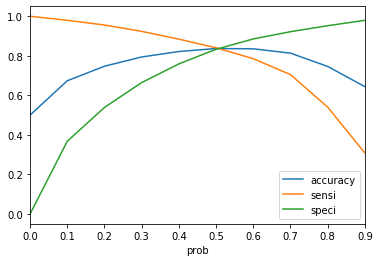

In [180]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Lets take the threshold as 0.35 to get a 90% recall

### Making predictions on test dataset

In [181]:
y_test_pred = model.predict(X_test_sm_rfe_2)

In [182]:
y_test_pred[:10]

0    0.584601
1    0.011520
2    0.192014
3    0.120661
4    0.408797
5    0.873329
6    0.000108
7    0.000053
8    0.057248
9    0.797732
dtype: float64

In [183]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame({'churn':list(y_test),'pred':y_test_pred})

In [184]:
y_pred_df.head()

churn      pred
0      0  0.584601
1      0  0.011520
2      0  0.192014
3      0  0.120661
4      0  0.408797

In [185]:
y_pred_df['predicted_churn'] = y_pred_df['pred'].apply(lambda x:1 if x>0.35 else 0)

In [186]:
y_pred_df.head()

churn      pred  predicted_churn
0      0  0.584601                1
1      0  0.011520                0
2      0  0.192014                0
3      0  0.120661                0
4      0  0.408797                1

In [187]:
print(classification_report(y_pred_df['churn'],y_pred_df['predicted_churn']))

              precision    recall  f1-score   support

           0       0.99      0.70      0.82      6816
           1       0.22      0.89      0.35       642

    accuracy                           0.72      7458
   macro avg       0.60      0.80      0.59      7458
weighted avg       0.92      0.72      0.78      7458



In [188]:
print(confusion_matrix(y_pred_df['churn'],y_pred_df['predicted_churn']))

[[4795 2021]
 [  69  573]]


## We have been able to achieve a recall value of 0.89 but at the cost of compromising on the f1 score/precision

### Applying Random Forests to the resampled dataset

In [189]:
upsampled.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6   arpu_7  \
20224             0.0             0.0             0.0  320.970  377.613   
19333             0.0             0.0             0.0  598.736  533.547   
4104              0.0             0.0             0.0  854.269  705.393   
23783             0.0             0.0             0.0  562.455  227.759   
8293              0.0             0.0             0.0  623.888  719.512   

        arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
20224  393.227         5.71        88.43        10.43        264.68   
19333  509.522       115.74         0.59         1.43        876.43   
4104   651.353      1131.23      1418.14      1472.38         52.59   
23783  586.181       361.38        85.98       145.49        190.28   
8293   948.848        43.31       106.34        84.06       1196.81   

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
20224        208.79        302.71           0.00           0.00   
19333        894.69        824.86           0.00           0.00   
4104          22.21         49.19          16.54           3.11   
23783         69.31        426.51          52.86         104.58   
8293        1124.96       1455.04           0.00           0.00   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
20224           0.00           0.00           0.00           0.00   
19333           0.00           0.00           0.00           0.00   
4104            0.00        1146.59         141.45           0.00   
23783          89.16         193.11         155.29         141.76   
8293            0.00           0.00           0.00           0.00   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
20224              5.13             83.86             10.43            260.98   
19333              1.45              0.59              1.43             13.88   
4104               0.16             10.91              9.18              1.88   
23783             33.64              0.00             44.74             79.88   
8293              35.99             69.91             83.51            372.28   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
20224            205.54            291.31              0.00              1.46   
19333             34.06             14.03              3.48              0.00   
4104              15.46              8.81              0.00              0.00   
23783              0.00             92.96              2.38              0.00   
8293             247.64            243.69              0.00              0.00   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
20224              3.98              3.69              1.41              4.71   
19333              4.31              2.23              2.56              6.84   
4104               0.00             11.03              0.00              0.63   
23783              6.78              0.00              0.00              0.00   
8293               0.00              0.00              0.16              2.21   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
20224        266.11        290.88        305.73              0.58   
19333         18.81         34.66         19.78            114.29   
4104           2.05         26.38         17.99             35.18   
23783        115.91          0.00        144.49            224.08   
8293         408.28        317.56        327.21              7.31   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
20224              4.56              0.00              0.00              0.36   
19333              0.00              0.00            856.83            857.63   
4104            1269.78           1463.19              0.00              1.11   
23783              0.00             22.84             18.54              0.00   
8293              36.43       

In [190]:
upsampled.reset_index(inplace=True)

In [191]:
upsampled.drop('index',inplace=True,axis=1)

In [192]:
upsampled.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6   arpu_7   arpu_8  \
0             0.0             0.0             0.0  320.970  377.613  393.227   
1             0.0             0.0             0.0  598.736  533.547  509.522   
2             0.0             0.0             0.0  854.269  705.393  651.353   
3             0.0             0.0             0.0  562.455  227.759  586.181   
4             0.0             0.0             0.0  623.888  719.512  948.848   

   onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
0         5.71        88.43        10.43        264.68        208.79   
1       115.74         0.59         1.43        876.43        894.69   
2      1131.23      1418.14      1472.38         52.59         22.21   
3       361.38        85.98       145.49        190.28         69.31   
4        43.31       106.34        84.06       1196.81       1124.96   

   offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0        302.71           0.00           0.00           0.00           0.00   
1        824.86           0.00           0.00           0.00           0.00   
2         49.19          16.54           3.11           0.00        1146.59   
3        426.51          52.86         104.58          89.16         193.11   
4       1455.04           0.00           0.00           0.00           0.00   

   roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0           0.00           0.00              5.13             83.86   
1           0.00           0.00              1.45              0.59   
2         141.45           0.00              0.16             10.91   
3         155.29         141.76             33.64              0.00   
4           0.00           0.00             35.99             69.91   

   loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0             10.43            260.98            205.54            291.31   
1              1.43             13.88             34.06             14.03   
2              9.18              1.88             15.46              8.81   
3             44.74             79.88              0.00             92.96   
4             83.51            372.28            247.64            243.69   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
0              0.00              1.46              3.98              3.69   
1              3.48              0.00              4.31              2.23   
2              0.00              0.00              0.00             11.03   
3              2.38              0.00              6.78              0.00   
4              0.00              0.00              0.00              0.00   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
0              1.41              4.71        266.11        290.88   
1              2.56              6.84         18.81         34.66   
2              0.00              0.63          2.05         26.38   
3              0.00              0.00        115.91          0.00   
4              0.16              2.21        408.28        317.56   

   loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
0        305.73              0.58              4.56              0.00   
1         19.78            114.29              0.00              0.00   
2         17.99             35.18           1269.78           1463.19   
3        144.49            224.08              0.00             22.84   
4        327.21              7.31             36.43              0.55   

   std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  \
0              0.00              0.36              2.70               0.0   
1            856.83            857.63            799.66               0.0   
2              0.00              1.11             36.91               0.0   
3             18.54              0.00            262.89               0.0   
4            824.53   

In [193]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [194]:
X_train_rf = upsampled.drop('churn',axis=1)
y_train_rf = upsampled['churn']

In [195]:
# fit
rfc.fit(X_train_rf,y_train_rf)

RandomForestClassifier()

In [196]:
# Making predictions
predictions_rf = rfc.predict(X_test)

In [197]:
# Let's check the report of our default model
print(classification_report(y_test,predictions_rf))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6816
           1       0.72      0.52      0.60       642

    accuracy                           0.94      7458
   macro avg       0.84      0.75      0.79      7458
weighted avg       0.94      0.94      0.94      7458



<b>Lets tune the model to improve the performance metrics</b>

Tuning Max Depth

In [198]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True,n_jobs=5,verbose=2)
rf.fit(X_train_rf, y_train_rf)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  20 out of  20 | elapsed:  2.1min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=5,
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy', verbose=2)

In [199]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       8.582824      0.209241         0.201661        0.032839   
1      21.320863      0.190925         0.281848        0.020013   
2      37.170961      0.052700         0.403921        0.011682   
3      43.286571      0.242359         0.572088        0.033830   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.798390           0.788755   
1               7   {'max_depth': 7}           0.895963           0.895353   
2              12  {'max_depth': 12}           0.973533           0.976095   
3              17  {'max_depth': 17}           0.985242           0.987437   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.798878           0.790340           0.787387         0.792750   
1           0.899134           0.897792           0.886924         0.895033   
2           0.969630           0.972192           0.971334         0.972557   
3           0.984388           0.984876           0.984874         0.985364   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.004897                4            0.798750            0.793414   
1        0.004270                3            0.902882            0.901296   
2        0.002175                2            0.980485            0.981217   
3        0.001072                1            0.991462            0.990974   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.789755            0.793261            0.794762   
1            0.904162            0.901113            0.903159   
2            0.980058            0.981887            0.980912   
3            0.991493            0.991554            0.991127   

   mean_train_score  std_train_score  
0          0.793988         0.002900  
1          0.902522         0.001159  
2          0.980912         0.000626  
3          0.991322         0.000229

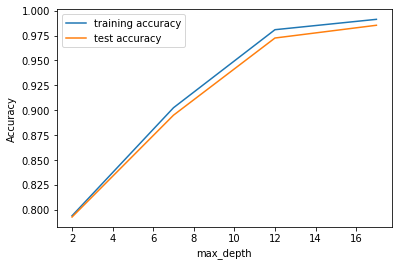

In [200]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [201]:
# parameters to build the model on
parameters = {'n_estimators': range(100, 800, 100)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=7)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True,verbose=2,n_jobs=4)
rf.fit(X_train_rf, y_train_rf)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  35 out of  35 | elapsed: 11.3min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=7), n_jobs=4,
             param_grid={'n_estimators': range(100, 800, 100)},
             return_train_score=True, scoring='accuracy', verbose=2)

In [202]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      18.320940      0.360078         0.216621        0.015962   
1      35.225099      1.098246         0.418123        0.038675   
2      52.170249      1.142735         0.638298        0.090834   
3      70.546376      1.121114         0.797661        0.045132   
4      94.007102      2.278014         0.997133        0.107645   

  param_n_estimators                 params  split0_test_score  \
0                100  {'n_estimators': 100}           0.897305   
1                200  {'n_estimators': 200}           0.897548   
2                300  {'n_estimators': 300}           0.895719   
3                400  {'n_estimators': 400}           0.895597   
4                500  {'n_estimators': 500}           0.896939   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.898402           0.898524           0.896085           0.890583   
1           0.895109           0.898280           0.897548           0.887656   
2           0.895231           0.897670           0.895719           0.887168   
3           0.894621           0.899134           0.895231           0.888875   
4           0.895231           0.899012           0.895353           0.887412   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.896180        0.002934                1            0.903735   
1         0.895228        0.003936                3            0.903369   
2         0.894301        0.003664                7            0.901448   
3         0.894692        0.003307                6            0.902546   
4         0.894789        0.003934                5            0.901509   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.901265            0.902760            0.903064   
1            0.901692            0.901753            0.902089   
2            0.900595            0.903004            0.900717   
3            0.899588            0.903247            0.901814   
4            0.900839            0.903491            0.901418   

   split4_train_score  mean_train_score  std_train_score  
0            0.903311          0.902827         0.000844  
1            0.902945          0.902370         0.000671  
2            0.902580          0.901669         0.000972  
3            0.904470          0.902333         0.001628  
4            0.903128          0.902077         0.001039

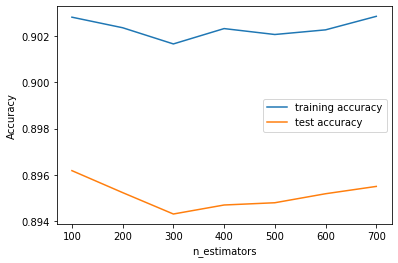

In [203]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [204]:
# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20,24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=7)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True,n_jobs=5,verbose=2)
rf.fit(X_train_rf, y_train_rf)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  25 out of  25 | elapsed:  2.2min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=7), n_jobs=5,
             param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy', verbose=2)

In [205]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       8.563004      0.170654         0.287116        0.039814   
1      15.908275      0.275617         0.292413        0.024549   
2      25.023074      0.327233         0.263695        0.029657   
3      34.995847      0.117657         0.290468        0.016074   
4      39.698394      0.568023         0.253323        0.035637   

  param_max_features                params  split0_test_score  \
0                  4   {'max_features': 4}           0.874375   
1                  8   {'max_features': 8}           0.887547   
2                 14  {'max_features': 14}           0.898646   
3                 20  {'max_features': 20}           0.900476   
4                 24  {'max_features': 24}           0.909501   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.870350           0.877180           0.874985           0.867041   
1           0.891816           0.893402           0.887425           0.881556   
2           0.899866           0.904379           0.896451           0.891071   
3           0.907916           0.906208           0.903891           0.902293   
4           0.909013           0.911087           0.909013           0.900829   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.872786        0.003622                5            0.880653   
1         0.888349        0.004128                4            0.896295   
2         0.898082        0.004358                3            0.904772   
3         0.904157        0.002662                2            0.908431   
4         0.907889        0.003611                1            0.915292   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.877939            0.878457            0.876993   
1            0.897637            0.896539            0.893124   
2            0.904894            0.910413            0.903430   
3            0.911541            0.909681            0.911572   
4            0.914103            0.916481            0.916634   

   split4_train_score  mean_train_score  std_train_score  
0            0.879650          0.878738         0.001285  
1            0.898524          0.896424         0.001833  
2            0.906848          0.906072         0.002429  
3            0.915264          0.911298         0.002311  
4            0.913983          0.915299         0.001126

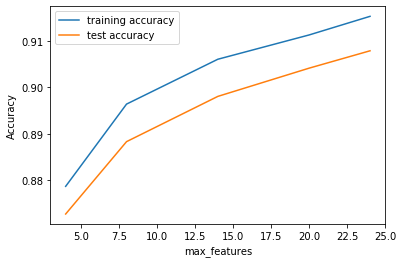

In [206]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [207]:
# parameters to build the model on
parameters = {'min_samples_leaf': range(10, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True,verbose=2,n_jobs=5)
rf.fit(X_train_rf, y_train_rf)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:  3.8min
[Parallel(n_jobs=5)]: Done  40 out of  40 | elapsed:  4.4min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=5,
             param_grid={'min_samples_leaf': range(10, 400, 50)},
             return_train_score=True, scoring='accuracy', verbose=2)

In [208]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      36.205574      0.089057         0.428455        0.005801   
1      29.064364      0.205467         0.455383        0.040417   
2      32.917887      0.137488         0.376992        0.021585   
3      27.545073      0.099880         0.374997        0.031557   
4      27.563209      0.125644         0.385170        0.036072   

  param_min_samples_leaf                     params  split0_test_score  \
0                     10   {'min_samples_leaf': 10}           0.976948   
1                     60   {'min_samples_leaf': 60}           0.912306   
2                    110  {'min_samples_leaf': 110}           0.885718   
3                    160  {'min_samples_leaf': 160}           0.874497   
4                    210  {'min_samples_leaf': 210}           0.868155   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.976826           0.974021           0.972924           0.972066   
1           0.910721           0.910233           0.911575           0.903269   
2           0.886084           0.888523           0.885474           0.876677   
3           0.874863           0.878156           0.878156           0.865333   
4           0.869252           0.871326           0.870106           0.864723   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.974557        0.002001                1            0.984388   
1         0.909621        0.003254                2            0.918006   
2         0.884495        0.004058                3            0.891416   
3         0.874201        0.004700                4            0.877085   
4         0.868712        0.002249                5            0.871383   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.983443            0.983809            0.983839   
1            0.916237            0.918036            0.919622   
2            0.891233            0.893063            0.890685   
3            0.878732            0.877939            0.879982   
4            0.872084            0.871932            0.872237   

   split4_train_score  mean_train_score  std_train_score  
0            0.984144          0.983924         0.000321  
1            0.921027          0.918586         0.001624  
2            0.890200          0.891319         0.000971  
3            0.876509          0.878049         0.001226  
4            0.875137          0.872555         0.001323

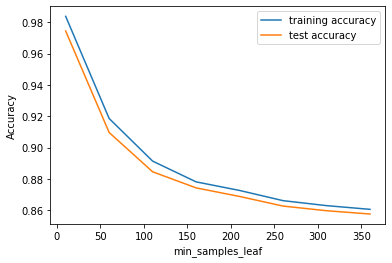

In [209]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [210]:
# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True,verbose=2,n_jobs=5)
rf.fit(X_train_rf, y_train_rf)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:  3.8min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=5,
             param_grid={'min_samples_split': range(200, 500, 50)},
             return_train_score=True, scoring='accuracy', verbose=2)

In [211]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      42.206767      0.220759         0.552056        0.054037   
1      39.361092      0.157919         0.371789        0.018216   
2      35.480206      0.430029         0.387963        0.020816   
3      34.901966      0.245608         0.384284        0.052836   
4      33.435282      0.781604         0.388940        0.044547   

  param_min_samples_split                      params  split0_test_score  \
0                     200  {'min_samples_split': 200}           0.928772   
1                     250  {'min_samples_split': 250}           0.916209   
2                     300  {'min_samples_split': 300}           0.909379   
3                     350  {'min_samples_split': 350}           0.896695   
4                     400  {'min_samples_split': 400}           0.894011   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.928406           0.931089           0.926576           0.920468   
1           0.919380           0.915965           0.917307           0.910832   
2           0.906208           0.911331           0.908891           0.900707   
3           0.901085           0.903647           0.903281           0.892535   
4           0.894133           0.901695           0.898646           0.884362   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.927062        0.003596                1            0.938009   
1         0.915939        0.002824                2            0.926239   
2         0.907303        0.003681                3            0.917091   
3         0.899449        0.004251                4            0.905321   
4         0.894570        0.005867                5            0.899375   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.939899            0.943680            0.938436   
1            0.927794            0.925751            0.926513   
2            0.912853            0.918097            0.917823   
3            0.907089            0.909590            0.909864   
4            0.897393            0.905016            0.904132   

   split4_train_score  mean_train_score  std_train_score  
0            0.939840          0.939973         0.001999  
1            0.929290          0.927117         0.001279  
2            0.918527          0.916878         0.002066  
3            0.909593          0.908291         0.001796  
4            0.900384          0.901260         0.002885

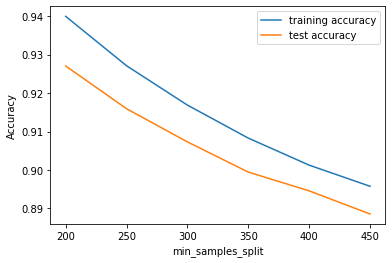

In [212]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<b>Grid Search to Find Optimal Hyperparameters</b>

In [213]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(10, 150, 50),
    'min_samples_split': range(200, 300, 150),
    'n_estimators': [100,200,300], 
    'max_features': range(5, 24, 4)
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 5,verbose = 2)

In [214]:
# Fit the grid search to the data
grid_search.fit(X_train_rf, y_train_rf)

Fitting 3 folds for each of 135 candidates, totalling 405 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:  1.4min
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed: 13.1min
[Parallel(n_jobs=5)]: Done 355 tasks      | elapsed: 44.2min
[Parallel(n_jobs=5)]: Done 405 out of 405 | elapsed: 56.3min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=5,
             param_grid={'max_depth': [4, 8, 10],
                         'max_features': range(5, 24, 4),
                         'min_samples_leaf': range(10, 150, 50),
                         'min_samples_split': range(200, 300, 150),
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [215]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9058885558386197 using {'max_depth': 10, 'max_features': 21, 'min_samples_leaf': 10, 'min_samples_split': 200, 'n_estimators': 300}


In [216]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=10, 
                             min_samples_split=200,
                             max_features=21,
                             n_estimators=300)

In [217]:
# fit
rfc.fit(X_train_rf,y_train_rf)

RandomForestClassifier(max_depth=10, max_features=21, min_samples_leaf=10,
                       min_samples_split=200, n_estimators=300)

In [218]:
# predict
predictions = rfc.predict(X_test)

In [219]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      6816
           1       0.49      0.80      0.60       642

    accuracy                           0.91      7458
   macro avg       0.73      0.86      0.78      7458
weighted avg       0.94      0.91      0.92      7458



<b>A good enough recall value after tuning the hyperparameters. Up from 0.52 to ~ 0.80</b>

### Lets look at the most significant predictor variables - 

In [220]:
feature_imp_list=[]

In [221]:
for feat, importance in zip(X_train_rf.columns, rfc.feature_importances_):  
    temp = [feat, importance*100]
    feature_imp_list.append(temp)

fT_df = pd.DataFrame(feature_imp_list, columns = ['Feature', 'Importance'])
print (fT_df.sort_values('Importance', ascending = False))

                 Feature  Importance
89        total_ic_mou_8   10.133260
71          loc_ic_mou_8    8.662300
62      loc_ic_t2t_mou_8    6.156123
65      loc_ic_t2m_mou_8    5.328711
23      loc_og_t2m_mou_8    5.135981
110   last_day_rch_amt_8    5.130879
17         roam_og_mou_8    4.971395
32          loc_og_mou_8    4.641651
14         roam_ic_mou_8    4.541003
160  days_since_recharge    4.494118
104     total_rech_amt_8    4.430223
59        total_og_mou_8    3.557157
5                 arpu_8    3.449883
20      loc_og_t2t_mou_8    2.267775
68      loc_ic_t2f_mou_8    1.804311
125   av_rech_amt_data_8    1.251478
107       max_rech_amt_8    1.137357
86          std_ic_mou_8    1.043269
11          offnet_mou_8    0.978129
116      max_rech_data_8    0.705098
26      loc_og_t2f_mou_8    0.668854
100     total_rech_num_7    0.658412
4                 arpu_7    0.611248
46          std_og_mou_7    0.595828
47          std_og_mou_8    0.558328
77      std_ic_t2m_mou_8    0.538174
1

### Now I will be using XGBoost first on the imbalanced class dataset and then apply the second method to upsample the minority class which is SMOTE! and then apply the other ML Algos - 

#### Using XGBoost -

In [222]:
high_valued.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0             0.0             0.0             0.0  1069.180  1349.850   
1             0.0             0.0             0.0   378.721   492.223   
2             0.0             0.0             0.0   492.846   205.671   
3             0.0             0.0             0.0   430.975   299.869   
4             0.0             0.0             0.0   690.008    18.980   

     arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0  3171.480        57.84        54.68        52.29        453.43   
1   137.362       413.69       351.03        35.08         94.66   
2   593.260       501.76       108.39       534.24        413.31   
3   187.894        50.51        74.01        70.61        296.29   
4    25.499      1185.91         9.28         7.79         61.64   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0        567.16        325.91          16.23          33.49          31.64   
1         80.63        136.48           0.00           0.00           0.00   
2        119.28        482.46          23.53         144.24          72.11   
3        229.74        162.76           0.00           2.83           0.00   
4          0.00          5.54           0.00           4.76           4.81   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0          23.74          12.59          38.06             51.39   
1           0.00           0.00           0.00            297.13   
2           7.98          35.26           1.44             49.63   
3           0.00          17.74           0.00             42.61   
4           0.00           8.46          13.34             38.99   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0             31.38             40.28            308.63            447.38   
1            217.59             12.49             80.96             70.58   
2              6.19             36.01            151.13             47.28   
3             65.16             67.38            273.29            145.99   
4              0.00              0.00             58.54              0.00   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0            162.28             62.13             55.14             53.23   
1             50.54              0.00              0.00              0.00   
2            294.46              4.54              0.00             23.51   
3            128.28              0.00              4.48             10.26   
4              0.00              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0               0.0              0.00        422.16   
1               0.0               0.0              7.15        378.09   
2               0.0               0.0              0.49        205.31   
3               0.0               0.0              0.00        315.91   
4               0.0               0.0              0.00         97.54   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0        533.91        255.79              4.30             23.29   
1        288.18         63.04            116.56            133.43   
2         53.48        353.99            446.41             85.98   
3        215.64        205.93              7.89              2.58   
4          0.00          0.00           1146.91              0.81   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0             12.01             49.89             31.76             49.14   
1             22.58             13.69             10.04             75.69   
2            498.23            255.36             52.94            156.94   
3              3.23             22.99             64.51             18.29   
4              0.00              1.55              0.00              0.00   

   std_og_t2f_mou_6  std_og_t2f_mo

In [223]:
X_xg = high_valued.drop('churn',axis=1)
y_xg = high_valued['churn']

### Trying out XGBoost without upsampling the minority class - 

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X_xg,y_xg,test_size=0.33)

In [225]:
from xgboost import XGBClassifier

In [226]:
model = XGBClassifier()

In [227]:
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score

In [228]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

In [229]:
# using the scoring as recall_micro as I'm more interested in the recall metric
scores = cross_val_score(model, X_train, y_train, scoring='recall_micro', cv=cv, n_jobs=4,verbose=2)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:  4.9min finished


In [230]:
print('Mean Micro Recall: %.5f' % np.mean(scores))

Mean Recall: 0.94017


In [231]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [232]:
predictions_xg_base = model.predict(X_test)

In [233]:
print(classification_report(y_test,predictions_xg_base))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      9071
           1       0.67      0.54      0.60       773

    accuracy                           0.94      9844
   macro avg       0.82      0.76      0.79      9844
weighted avg       0.94      0.94      0.94      9844



In [234]:
print(confusion_matrix(y_test,predictions_xg_base))

[[8864  207]
 [ 352  421]]


XGBoost provides a hyperparameter designed to tune the behavior of the algorithm for imbalanced classification problems; this is the <b><u>scale_pos_weight</u> hyperparameter.</b><br><br>By default, the scale_pos_weight hyperparameter is set to the value of 1.0 and has the effect of weighing the balance of positive examples, relative to negative examples when boosting decision trees. For an imbalanced binary classification dataset, the negative class refers to the majority class (class 0) and the positive class refers to the minority class (class 1)<br><br>A sensible default value to set for the scale_pos_weight hyperparameter is the inverse of the class distribution. For example, for a dataset with a 1 to 100 ratio for examples in the minority to majority classes, the scale_pos_weight can be set to 100. This will give classification errors made by the model on the minority class (positive class) 100 times more impact, and in turn, 100 times more correction than errors made on the majority class.<br><br>

To read more - <a href="https://machinelearningmastery.com/xgboost-for-imbalanced-classification/">Here is the link</a>

The ratio of minority class to majority class in our dataset is around 8/92 and so lets try a scale_pos_weight as 92/8 ~ 12

In [235]:
model = XGBClassifier(scale_pos_weight=12)

In [236]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=12, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [237]:
predictions_xg_1 = model.predict(X_test)

In [238]:
print(classification_report(y_test,predictions_xg_1))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      9071
           1       0.58      0.69      0.63       773

    accuracy                           0.94      9844
   macro avg       0.78      0.82      0.80      9844
weighted avg       0.94      0.94      0.94      9844



<b>We have been able to reach to a recall value of ~ 0.69 without oversampling the minority class. Shows how powerful a boosting algo can be!<b>

#### Lets tune this parameter using gridsearchcv

In [239]:
weights = [1,5,8, 12]
param_grid = dict(scale_pos_weight=weights)

In [240]:
model = XGBClassifier()

In [241]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=4, cv=cv, scoring='recall_micro',verbose=2)

In [242]:
grid_result = grid.fit(X_train, y_train)

Fitting 15 folds for each of 4 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 12.7min
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed: 21.7min finished


In [243]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.940175 using {'scale_pos_weight': 1}


In [244]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.940175 (0.001840) with: {'scale_pos_weight': 1}
0.938524 (0.003398) with: {'scale_pos_weight': 5}
0.938590 (0.003399) with: {'scale_pos_weight': 8}
0.936839 (0.002783) with: {'scale_pos_weight': 12}


In [245]:
model = XGBClassifier(scale_pos_weight=12)

In [246]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=12, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [247]:
predictions_xg_1 = model.predict(X_test)

In [248]:
print(classification_report(y_test,predictions_xg_1))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      9071
           1       0.58      0.69      0.63       773

    accuracy                           0.94      9844
   macro avg       0.78      0.82      0.80      9844
weighted avg       0.94      0.94      0.94      9844



### Lets use SMOTE and then apply XGBoost and other ML Algos to it - 

The original paper on SMOTE suggested combining SMOTE with <b>random undersampling of the majority class</b> and hence we will be undersampling the majority class too.



In [249]:
import imblearn

In [250]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [251]:
oversample = SMOTE()

In [252]:
model = XGBClassifier()

In [253]:
X = pd.concat([X_train,y_train],axis=1)

In [254]:
# will use X which is a concatenation of X_train and y_train of 'high_valued' dataset--> Training dataset from the high_valued customers dataset
X.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
10313             0.0             0.0             0.0   225.735   461.330   
28335             0.0             0.0             0.0   579.928   910.648   
98                0.0             0.0             0.0  1462.285  1532.735   
1180              0.0             0.0             0.0   472.469   690.106   
3926              0.0             0.0             0.0   655.648   424.253   

         arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
10313   389.270        15.29        52.79        45.48         88.64   
28335  1076.346        25.56        58.51        51.66        418.58   
98     1875.755        97.61       156.83       173.61        637.41   
1180    397.108       227.59       242.31       174.38        468.49   
3926    421.214      1370.54      1132.11      1169.44        187.08   

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
10313        281.46        301.04           0.00           0.00   
28335        600.86        975.63           0.00           0.00   
98           942.01       1543.93         248.91           0.55   
1180         157.36        219.26           0.00           0.00   
3926         187.49         74.34           0.00           0.00   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
10313          12.31           0.00           0.00           5.41   
28335           8.64           0.00           0.00          15.24   
98             13.80         120.51           7.23          85.88   
1180            0.00           0.00           0.00           0.00   
3926            0.00           0.00           0.00           0.00   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
10313              0.00              3.48              8.24              2.13   
28335             15.29             40.68             25.16            185.13   
98                61.58            143.83            164.51            422.34   
1180             227.59            242.31            174.38            468.38   
3926              37.19              6.01             33.78             48.29   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
10313             20.43             69.13              0.00              6.34   
28335            271.81            317.24             46.41             40.69   
98               768.51           1360.83             17.84             42.01   
1180             148.49            176.86              0.00              2.71   
3926              23.68             50.41              0.84              0.65   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
10313             13.71               6.0              0.00              0.00   
28335            165.88               0.0              0.26              2.34   
98                28.28               0.0              0.00              0.00   
1180              28.54               0.0              0.00              0.00   
3926               5.26               0.0              0.00              0.00   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
10313          2.13         30.26         91.09             15.29   
28335        246.84        353.19        508.29             10.26   
98           501.78        954.36       1553.63              0.00   
1180         695.98        393.53        379.79              0.00   
3926          86.34         30.34         89.46           1333.34   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
10313             49.31             37.23             75.08            193.63   
28335             17.83             25.11            114.01            211.14   
98                 9.08              3.03             76.79             75.38   
1180               0.00              0.00              0.00              0.00   
3926        

In [255]:
X.reset_index(inplace=True)

In [256]:
X.drop('index',inplace=True,axis=1)

In [257]:
X.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0             0.0             0.0             0.0   225.735   461.330   
1             0.0             0.0             0.0   579.928   910.648   
2             0.0             0.0             0.0  1462.285  1532.735   
3             0.0             0.0             0.0   472.469   690.106   
4             0.0             0.0             0.0   655.648   424.253   

     arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   389.270        15.29        52.79        45.48         88.64   
1  1076.346        25.56        58.51        51.66        418.58   
2  1875.755        97.61       156.83       173.61        637.41   
3   397.108       227.59       242.31       174.38        468.49   
4   421.214      1370.54      1132.11      1169.44        187.08   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0        281.46        301.04           0.00           0.00          12.31   
1        600.86        975.63           0.00           0.00           8.64   
2        942.01       1543.93         248.91           0.55          13.80   
3        157.36        219.26           0.00           0.00           0.00   
4        187.49         74.34           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           5.41              0.00   
1           0.00           0.00          15.24             15.29   
2         120.51           7.23          85.88             61.58   
3           0.00           0.00           0.00            227.59   
4           0.00           0.00           0.00             37.19   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              3.48              8.24              2.13             20.43   
1             40.68             25.16            185.13            271.81   
2            143.83            164.51            422.34            768.51   
3            242.31            174.38            468.38            148.49   
4              6.01             33.78             48.29             23.68   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0             69.13              0.00              6.34             13.71   
1            317.24             46.41             40.69            165.88   
2           1360.83             17.84             42.01             28.28   
3            176.86              0.00              2.71             28.54   
4             50.41              0.84              0.65              5.26   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               6.0              0.00              0.00          2.13   
1               0.0              0.26              2.34        246.84   
2               0.0              0.00              0.00        501.78   
3               0.0              0.00              0.00        695.98   
4               0.0              0.00              0.00         86.34   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         30.26         91.09             15.29             49.31   
1        353.19        508.29             10.26             17.83   
2        954.36       1553.63              0.00              9.08   
3        393.53        379.79              0.00              0.00   
4         30.34         89.46           1333.34           1126.09   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0             37.23             75.08            193.63            193.61   
1             25.11            114.01            211.14            366.94   
2              3.03             76.79             75.38             52.54   
3              0.00              0.00              0.00              0.00   
4           1135.66            137.93            163.16             18.66   

   std_og_t2f_mou_6  std_og_t2f_mo

In [258]:
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

In [259]:
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [260]:
len(X)

19986

In [261]:
X.churn.sum()

1744

In [262]:
1964/22484

0.08735100515922434

In [263]:
y = X['churn']
X = X.drop('churn',axis=1)

In [264]:
X, y = pipeline.fit_resample(X, y)

In [265]:
len(y)

5472

In [266]:
y.sum()

1824

In [267]:
y.sum()/len(y)

0.3333333333333333

In [268]:
model.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [269]:
predictions = model.predict(X_test)

In [270]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      9071
           1       0.50      0.83      0.62       773

    accuracy                           0.92      9844
   macro avg       0.74      0.88      0.79      9844
weighted avg       0.95      0.92      0.93      9844



In [271]:
weights = [1,5,8,12]
param_grid = dict(scale_pos_weight=weights)

In [272]:
model = XGBClassifier()

In [273]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=4, cv=cv, scoring='roc_auc',verbose=2)

In [274]:
grid_result = grid.fit(X, y)

Fitting 15 folds for each of 4 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  3.6min
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:  6.0min finished


In [275]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.940362 using {'scale_pos_weight': 1}


In [276]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.940362 (0.007853) with: {'scale_pos_weight': 1}
0.939959 (0.009752) with: {'scale_pos_weight': 5}
0.940296 (0.008939) with: {'scale_pos_weight': 8}
0.939390 (0.008344) with: {'scale_pos_weight': 12}


<b>Although the best roc_auc score might be obtained using scale_pos_weight=1, the best recall is being obtained by using scale_pos_weight=12</b>

In [277]:
model = XGBClassifier(scale_pos_weight=12)

In [278]:
model.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=12, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [279]:
predictions = model.predict(X_test)

In [280]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      9071
           1       0.40      0.87      0.55       773

    accuracy                           0.89      9844
   macro avg       0.69      0.88      0.74      9844
weighted avg       0.94      0.89      0.91      9844



### We are able to get a recall value of 0.87 using XGBoost

### Lets look at the most significant predictor variables - 

In [281]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.0054416 , 0.0087682 ,
       0.00466724, 0.00297634, 0.00346818, 0.00509245, 0.00362918,
       0.00236048, 0.00499723, 0.00857298, 0.0042839 , 0.02037855,
       0.00296351, 0.00787965, 0.02949736, 0.00617704, 0.00396329,
       0.00630959, 0.00329817, 0.00578549, 0.008988  , 0.00439649,
       0.0049521 , 0.00466691, 0.00445841, 0.00464605, 0.00227275,
       0.00412983, 0.00552437, 0.00904059, 0.00316307, 0.00399496,
       0.0020436 , 0.00213811, 0.00328811, 0.00307326, 0.0117793 ,
       0.00437494, 0.00584718, 0.        , 0.        , 0.        ,
       0.00241985, 0.00557793, 0.01033742, 0.00255499, 0.00241336,
       0.00573982, 0.00420541, 0.00418208, 0.00518882, 0.00563414,
       0.        , 0.        , 0.00239258, 0.00518591, 0.00734629,
       0.00345063, 0.00444521, 0.00457578, 0.00363832, 0.00552159,
       0.04114278, 0.00394607, 0.00505546, 0.00540168, 0.00575922,
       0.0051665 , 0.10187886, 0.00287867, 0.00273104, 0.00358

In [282]:
feature_imp_list = []

In [283]:
for feat, importance in zip(X.columns, model.feature_importances_):  
    temp = [feat, importance*100]
    feature_imp_list.append(temp)

fT_df = pd.DataFrame(feature_imp_list, columns = ['Feature', 'Importance'])
print (fT_df.sort_values('Importance', ascending = False))

                 Feature  Importance
71          loc_ic_mou_8   10.187886
65      loc_ic_t2m_mou_8    4.114278
89        total_ic_mou_8    3.412917
17         roam_og_mou_8    2.949736
160  days_since_recharge    2.738367
125   av_rech_amt_data_8    2.707073
110   last_day_rch_amt_8    2.342397
14         roam_ic_mou_8    2.037855
113    total_rech_data_8    1.946499
80      std_ic_t2f_mou_8    1.484993
92          spl_ic_mou_8    1.476358
151          sachet_3g_7    1.336689
143         monthly_2g_8    1.297514
131          vol_3g_mb_8    1.283085
39      std_og_t2f_mou_6    1.177930
139     night_pck_user_7    1.144402
100     total_rech_num_7    1.138731
47          std_og_mou_8    1.033742
91          spl_ic_mou_7    0.915020
32          loc_og_mou_8    0.904059
111    total_rech_data_6    0.903620
146          sachet_2g_8    0.899865
23      loc_og_t2m_mou_8    0.898800
4                 arpu_7    0.876820
107       max_rech_amt_8    0.872541
12         roam_ic_mou_6    0.857298
1

### Using Random Forest on SMOTE dataset - 

In [284]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [285]:
rfc.fit(X,y)

RandomForestClassifier()

In [286]:
predictions = rfc.predict(X_test)

In [287]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      9071
           1       0.52      0.74      0.61       773

    accuracy                           0.93      9844
   macro avg       0.75      0.84      0.78      9844
weighted avg       0.94      0.93      0.93      9844



In [288]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10,15],
    'min_samples_leaf': range(10, 150, 50),
    'min_samples_split': range(100, 200, 50),
    'n_estimators': [50,100,200], 
    'max_features': range(5, 30, 5)
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 5,verbose = 1)

In [289]:
# Fit the grid search to the data
grid_search.fit(X, y)

Fitting 3 folds for each of 270 candidates, totalling 810 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   28.4s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.6min
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:  6.0min
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed: 11.1min
[Parallel(n_jobs=5)]: Done 810 out of 810 | elapsed: 11.5min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=5,
             param_grid={'max_depth': [8, 10, 15],
                         'max_features': range(5, 30, 5),
                         'min_samples_leaf': range(10, 150, 50),
                         'min_samples_split': range(100, 200, 50),
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [290]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8687865497076023 using {'max_depth': 10, 'max_features': 25, 'min_samples_leaf': 10, 'min_samples_split': 100, 'n_estimators': 50}


In [291]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=10, 
                             min_samples_split=100,
                             max_features=25,
                             n_estimators=100)

In [292]:
rfc.fit(X,y)

RandomForestClassifier(max_depth=10, max_features=25, min_samples_leaf=10,
                       min_samples_split=100)

In [293]:
predictions = rfc.predict(X_test)

In [294]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      9071
           1       0.52      0.72      0.60       773

    accuracy                           0.93      9844
   macro avg       0.75      0.83      0.78      9844
weighted avg       0.94      0.93      0.93      9844



### Important Predictor Variables using RFC - 

In [295]:
feature_imp_list = []

In [296]:
for feat, importance in zip(X.columns, rfc.feature_importances_):  
    temp = [feat, importance*100]
    feature_imp_list.append(temp)

fT_df = pd.DataFrame(feature_imp_list, columns = ['Feature', 'Importance'])
print (fT_df.sort_values('Importance', ascending = False))

                 Feature  Importance
89        total_ic_mou_8   15.734794
71          loc_ic_mou_8    9.984047
32          loc_og_mou_8    6.793060
65      loc_ic_t2m_mou_8    6.684652
62      loc_ic_t2t_mou_8    5.322118
17         roam_og_mou_8    4.796950
59        total_og_mou_8    4.632995
14         roam_ic_mou_8    4.162324
5                 arpu_8    4.071458
104     total_rech_amt_8    3.756745
110   last_day_rch_amt_8    3.468125
20      loc_og_t2t_mou_8    3.331032
23      loc_og_t2m_mou_8    3.142381
160  days_since_recharge    3.048483
107       max_rech_amt_8    2.544821
11          offnet_mou_8    1.382379
125   av_rech_amt_data_8    0.960011
86          std_ic_mou_8    0.857851
100     total_rech_num_7    0.752886
26      loc_og_t2f_mou_8    0.700321
46          std_og_mou_7    0.654797
77      std_ic_t2m_mou_8    0.470293
101     total_rech_num_8    0.454134
58        total_og_mou_7    0.412709
116      max_rech_data_8    0.406081
13         roam_ic_mou_7    0.373415
6

## Now in this last section, I will be applying the different algorithms on a dimensionality reduced dataset (PCA was applied) - 

### Lets use PCA and then apply SMOTE and then XGBoost, RFC and Linear Regression - 

In [297]:
df_final.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.698888  6.177418 -1.193456  5.684118  1.837928  4.489923  3.730326   
1 -0.221963 -3.010791 -0.142213 -2.261446 -0.681817  0.080602  1.501221   
2 -1.456454  1.341730 -0.512258 -0.482633  5.486085 -0.595897  1.118785   
3 -1.999467 -0.989091 -2.617977  0.964902  1.005601 -0.294487 -0.480616   
4 -3.272207 -3.536141 -0.503142  0.787379 -0.542900 -1.451454  0.148599   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  2.533494 -3.530319  4.166342 -0.652180 -0.462972 -0.580861 -0.757824   
1 -1.243997 -0.074026 -0.782149  0.329599  0.974952  0.480822  0.045582   
2  1.420875  0.173299 -0.972037 -0.301396  1.995258  0.226502  2.295271   
3  0.978107 -0.220426 -0.617438  0.483039  0.358015 -0.429941 -0.770797   
4  1.190816  0.677339 -0.554111  1.904284 -1.156761 -0.469000  0.134861   

       PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0  1.029110  1.109923  0.208009 -2.217698  0.970791  1.504307 -1.840276   
1 -0.194182 -0.317289  0.895986  0.844343  0.779121 -0.195321  0.314811   
2  6.109191 -1.049504 -0.038179 -0.444888  0.902127 -0.274577 -1.051672   
3 -0.123704  0.110579 -0.266319 -0.193331  0.101885  0.117385 -0.084740   
4 -0.026107 -0.692311  0.134686  0.597678  1.265464 -0.188379 -0.172437   

       PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
0  2.091724 -0.115674 -0.476711  0.361925 -0.146664 -4.606683  0.913427   
1 -1.274065 -0.375354 -0.706155 -0.455984  1.026421 -0.044228 -0.443075   
2  2.156380 -0.051258 -0.252062 -0.193998 -0.053054 -0.074761  0.420894   
3 -0.267721  0.339763 -0.060042  0.073015  0.003298  0.131074 -0.100017   
4  0.570099 -0.074973 -0.041857 -0.017128  0.062219 -0.015460 -0.296137   

       PC29      PC30      PC31      PC32      PC33      PC34      PC35  \
0 -2.693041 -2.218252 -0.437428 -1.128819 -0.148836  0.192699  1.960554   
1  0.135816  0.503594 -0.211145 -0.169597 -0.122131  2.029521  0.045514   
2  1.350139 -0.364218 -1.284051  1.839788  1.716439  1.811530 -0.454812   
3 -0.402648  0.505657  0.169550  0.017233  0.007639 -0.363676  0.352283   
4 -0.053115 -0.187743 -0.861633  1.095202  0.123412  0.063881  0.089840   

       PC36      PC37      PC38      PC39      PC40      PC41      PC42  \
0 -0.620535 -0.218039 -1.641130  2.501451  2.385449 -0.841622 -0.546359   
1 -0.054304 -0.031518 -0.961913  0.456855  0.142052 -0.421443 -1.170727   
2  0.873902  1.073996 -0.227216 -1.382204 -0.644161 -0.041046 -0.169426   
3  0.471277 -0.512835  0.215603  0.013758  0.348362  0.068197 -0.887570   
4 -0.674287  0.394822 -0.080590 -0.411290  0.455146  0.618951 -0.333034   

       PC43      PC44      PC45      PC46      PC47      PC48      PC49  \
0 -1.312051 -0.589893  0.210620  1.544724  0.472837 -2.073552  0.978673   
1 -0.755151 -0.075385  0.437130  0.014710  0.979324 -0.697284 -0.448803   
2  0.931631  0.216018 -0.591539  0.242890  0.161781  0.399382 -0.755582   
3 -0.161344 -0.144862 -0.296184 -0.485655 -0.055421 -0.261215 -0.182631   
4  0.199183 -0.467004  0.377271 -1.118693  1.196698 -0.304183  0.710085   

       PC50      PC51      PC52      PC53      PC54      PC55      PC56  \
0  1.833731 -0.745535  0.414916 -0.591571 -2.095778 -0.209404 -0.238863   
1 -0.974442  0.519444 -0.700566 -0.374386 -0.440093  2.114254  0.628831   
2  0.742090 -1.964544  0.511547 -1.515201  0.654109  0.802670 -0.380816   
3  0.618188  0.180251  0.158360  0.290909 -0.200207 -0.090286 -0.096047   
4 -0.246086  0.198573  0.094061  0.197556 -0.075486 -0.152448 -0.085469   

       PC57      PC58      PC59      PC60      PC61      PC62      PC63  \
0 -0.581816 -0.232544 -0.248020 -1.377400  3.974082  0.138382 -1.999247   
1 -1.359706 -0.285399  0.172692  0.015285  0.070288 -0.297263  0.394988   
2 -0.761560  2.144773  1.433793 -0.580188  0.065473 -0.929471  0.213843   
3 -0.108028 -0.442576 -0.207834  0.105328 -0.559761  0.109586  0.105548   
4 -0.137845  0.168814 -0.

In [298]:
sum(df_final['churn'])/len(df_final)

0.08437814280925243

#### Lets apply SMOTE!

In [299]:
# df_final has the dimensionality reduced dataset
y = df_final['churn']
X = df_final.drop('churn',axis=1)

In [300]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)

In [301]:
X_train.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
23444   4.409938 -5.124295 -0.795541  3.809109 -0.408552 -1.156571 -0.420895   
27953  -3.760536  0.863189  5.673671 -4.954620 -0.981819 -1.870573 -2.635815   
8331   14.629491 -5.218456  3.576887  4.889816 -1.305736 -2.973117 -3.557249   
9370    6.011099 -4.712866 -0.337587  2.966658 -0.350847 -1.474350 -1.087844   
24528   6.091173 -0.975232 -1.225874  0.168640 -1.169634 -1.028979  0.148269   

            PC8       PC9      PC10      PC11      PC12       PC13       PC14  \
23444 -0.310583  0.212342 -0.625081  1.875235 -0.775035  -0.536608   0.076635   
27953  0.764596  3.539712  8.718896  0.278859 -1.122250  34.025466 -12.169848   
8331   2.433376  0.899991 -1.922800  3.929607 -2.021903  -0.570866   0.593317   
9370  -0.449438  0.613839 -0.401821  0.693529  0.108544  -0.153107   0.109497   
24528 -1.363833  0.465574 -0.685915  1.497445 -0.473127   0.242095   0.610803   

           PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
23444 -0.035581  1.027621  0.160802 -1.793141 -3.267303  0.677857  0.480980   
27953  0.228432  4.354090 -0.947238 -7.559015 -0.411925 -1.514490 -2.593584   
8331  -0.318237  0.436414  0.573996 -0.546986 -8.446529  1.101855  2.606709   
9370  -0.185149  0.234883  1.052708 -0.493359 -1.273617  0.357231 -0.581371   
24528  0.856122  0.339114  0.141492 -0.529180 -0.726084  1.583168 -0.397434   

           PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
23444 -1.826215 -0.314278  1.236946  0.623772 -1.390910  0.869960 -0.420150   
27953  1.248305  2.025592  5.028867 -1.105258  2.914418  1.443058 -1.175231   
8331  -6.290935 -1.807381  0.321170 -1.091432  1.025781 -2.298963 -0.722622   
9370   0.973897  0.396780  0.900853  0.655200 -1.554091  1.546260  0.317471   
24528 -0.502845  0.178142  1.053817  0.333834 -1.340104  1.325020  0.299792   

           PC29      PC30      PC31      PC32      PC33      PC34      PC35  \
23444  0.650344 -0.640107 -0.122588 -0.121243 -0.992909  2.891044  0.227730   
27953 -0.647528 -1.556716 -2.347040  1.630383 -0.116894  5.356148  4.241854   
8331  -1.584536  3.803951 -1.112895  2.735128  1.563039  3.540965 -0.989299   
9370   1.155719 -1.186170  0.036406 -0.520922 -0.262198  0.949806 -0.246005   
24528  1.023738 -1.540189  1.075137 -0.220750  0.057801 -0.984374  1.278689   

           PC36       PC37      PC38       PC39      PC40      PC41      PC42  \
23444  1.844382  -0.301854  0.041341   0.530200 -0.065151  1.983697 -0.189172   
27953  1.769274 -15.149041 -4.616366 -20.382756  8.555355 -1.774049  8.953135   
8331   1.875684   0.474747  0.209767  -0.856414  0.093391  0.219177 -0.260978   
9370  -0.474611  -1.256468 -0.335983   1.169212 -0.219108  0.084839 -0.310155   
24528  0.734706  -0.328241 -0.209333   0.057062 -1.153756 -0.890423  0.623183   

           PC43      PC44       PC45      PC46      PC47      PC48      PC49  \
23444  0.390453 -0.149794  -0.180634 -0.485801 -0.009526  0.609465  0.011929   
27953 -7.619824 -1.674432 -18.158865 -3.352469  3.514323 -0.424719  0.403859   
8331  -0.072471  0.145500   0.010119 -0.837936  0.276610  0.073132  0.029559   
9370   0.355937  0.108121  -0.417541 -0.644727 -0.357202  0.215784  0.369047   
24528  1.031793  0.773857   0.265832 -0.799381 -0.431511 -0.937707 -0.135092   

           PC50      PC51       PC52      PC53      PC54      PC55      PC56  \
23444  0.628583  0.235658  -0.057966 -0.034679 -0.261897  0.268921  1.066758   
27953  2.058146  7.833267 -13.817730 -4.892050  0.659148  0.769320 -1.444701   
8331   2.774891 -0.343834   0.752406 -0.047528 -1.336062 -1.876876  0.048963   
9370  -0.589949  0.252666   0.501881 -0.204238 -0.241069 -0.111074  0.162290   
24528  0.292149 -0.911844  -0.153822  0.178936 -0.243094  1.012885  2.372856   

           PC57      PC58      PC59      PC60      PC61      PC62      PC63  \
23444  0.252704  0.035198 -0.293406  0.325575  0.987466 -0.377568 -0.301442   
27953  0.4788

In [302]:
X_pca = pd.concat([X_train,y_train],axis=1)

In [303]:
X_pca.tail()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
27782 -2.087500 -0.802828 -2.274006  0.463435 -0.434831  0.566528 -0.751300   
27153 -2.644532 -2.656870 -1.068865  1.692505 -0.249719  0.611808 -0.701841   
20083 -0.300288 -2.680115 -1.666844  0.471633 -0.025066  0.485006  0.521520   
3055  -1.879939 -2.261056 -0.392671 -1.528074 -0.179047 -0.062738  1.156705   
29804  0.087374 -2.382841 -2.208199 -0.355873  0.667071  0.350450  0.972016   

            PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
27782  1.092702 -0.313429  0.266868  0.318331  0.777052  0.787042 -0.251567   
27153  0.155362 -0.624199  0.272870 -0.412747  0.496507 -0.677685 -0.000224   
20083 -0.023572  0.265638 -0.671941 -1.288555 -0.495039  0.737055 -0.028330   
3055   0.991349 -0.064910 -1.508197 -0.298563 -1.261865 -0.346408  0.583182   
29804 -1.620238  1.167454 -0.200632  0.229487  0.392597  0.426739 -0.275451   

           PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
27782  0.243353 -1.178510  0.074122  0.779280 -0.361187 -0.527844  0.377961   
27153  0.094508  1.176088 -0.061744 -0.260562 -0.194334  0.028298 -0.086443   
20083 -0.079351  0.467363 -1.192716  0.684792  0.207890  0.029822  0.627184   
3055  -0.098261  0.049955  1.848464 -0.283232 -0.085355 -0.017093  0.391698   
29804 -0.421561  0.199397 -1.630329  1.036245  0.124087 -0.065541 -0.124949   

           PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
27782  0.123037  0.177251 -0.008868  0.698948  0.062605 -0.543336 -0.556429   
27153 -0.344442  0.348759 -0.026851  0.141647  0.183252  0.170482 -0.504595   
20083 -2.599288 -0.589548  0.472214 -0.290112  0.323475  0.163277 -0.055910   
3055  -1.375733 -0.193262 -0.552939 -0.136435  0.197372 -0.203437 -0.161268   
29804  1.628441 -0.031459  0.654599 -0.254920  0.834042  0.383365 -0.370132   

           PC29      PC30      PC31      PC32      PC33      PC34      PC35  \
27782 -0.542168 -0.488645  0.013788  0.223925 -0.201036 -0.313371 -0.225648   
27153 -0.064813  0.623608 -0.024398 -0.183982 -0.162903 -0.586875 -0.042065   
20083  0.094900 -0.269537  0.005647 -0.400055  0.511535  0.759587  0.579955   
3055  -0.201517 -0.411921  0.730992 -0.895052  1.068009 -0.652221  0.771388   
29804  0.421094 -0.445765  0.400195 -1.001526 -0.063462  0.539102  0.242049   

           PC36      PC37      PC38      PC39      PC40      PC41      PC42  \
27782  0.278572  0.115930 -0.296643 -0.799191  0.117960 -0.174171  0.189368   
27153  0.465015  0.185164 -0.024529 -0.439565 -0.184871 -0.151226  0.453372   
20083  0.092668 -0.068459  0.431021  0.717011  1.220037  0.335192 -0.436484   
3055  -0.442814 -0.169596  0.442311  0.431616  1.200082  0.507631  0.137951   
29804 -0.282431  0.553212  0.553517  0.121808  0.083210 -0.403398  0.333089   

           PC43      PC44      PC45      PC46      PC47      PC48      PC49  \
27782  0.870034  0.229087  0.908439  0.108691 -0.471034 -0.031311  0.208509   
27153  0.657216  0.319121  0.229511 -0.523036  0.069451  0.046112 -0.352625   
20083 -0.073257  0.057612  0.371852 -0.508903 -0.375349 -0.685356  0.099613   
3055  -0.600601  0.728952  0.622926 -0.749466  0.319267 -0.685516 -0.425760   
29804 -0.059562 -0.122411 -0.198401  0.286747  0.120032  0.632277  0.834819   

           PC50      PC51      PC52      PC53      PC54      PC55      PC56  \
27782  0.207708  0.263930  0.203152 -0.236871 -0.096702 -0.104862  0.106161   
27153  0.476879  0.028280 -0.023037 -0.087068 -0.027923 -0.020041 -0.048110   
20083 -0.872194  0.060957  0.177802  1.433964 -0.810188  1.626055  1.333394   
3055  -0.732385  0.633356 -0.507908  0.532867 -0.074648 -0.310290  0.006121   
29804  0.517384 -0.682464  1.025514 -0.129542  0.584327 -1.894305 -1.337543   

           PC57      PC58      PC59      PC60      PC61      PC62      PC63  \
27782 -0.141693  0.148606 -0.060121  0.035464  0.101159 -0.123938 -0.063183   
27153 -0.038096  0.072332  0.026789  0.190754 -0.20793

In [304]:
sum(X_pca['churn'])/len(X_pca)

0.08370859601721205

In [305]:
pca_df_train = X_pca.copy()

In [306]:
X_train_pca = pca_df_train.drop('churn',axis=1)
y_train_pca = pca_df_train['churn']

In [307]:
X,y = pipeline.fit_resample(X_train_pca,y_train_pca)

In [308]:
sum(y)/len(y)

0.3333333333333333

### Applying RFC

In [309]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [310]:
rfc.fit(X,y)

RandomForestClassifier()

In [311]:
predictions_rfe_pca = rfc.predict(X_test)

In [312]:
print(classification_report(y_test,predictions_rfe_pca))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      9000
           1       0.48      0.60      0.54       844

    accuracy                           0.91      9844
   macro avg       0.72      0.77      0.74      9844
weighted avg       0.92      0.91      0.92      9844



In [313]:
# Lets tune the Model - 
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10,15],
    'min_samples_leaf': range(10, 150, 50),
    'min_samples_split': range(100, 200, 50),
    'n_estimators': [50,100,200], 
    'max_features': range(5, 30, 5)
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 5,verbose = 1)

In [314]:
# Fit the grid search to the data
grid_search.fit(X, y)

Fitting 3 folds for each of 270 candidates, totalling 810 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   21.3s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  3.6min
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed: 10.0min
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed: 20.4min
[Parallel(n_jobs=5)]: Done 810 out of 810 | elapsed: 21.0min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=5,
             param_grid={'max_depth': [8, 10, 15],
                         'max_features': range(5, 30, 5),
                         'min_samples_leaf': range(10, 150, 50),
                         'min_samples_split': range(100, 200, 50),
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [315]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8234116147824504 using {'max_depth': 8, 'max_features': 25, 'min_samples_leaf': 10, 'min_samples_split': 100, 'n_estimators': 200}


In [316]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=8,
                             min_samples_leaf=10, 
                             min_samples_split=100,
                             max_features=25,
                             n_estimators=200)

In [317]:
rfc.fit(X,y)

RandomForestClassifier(max_depth=8, max_features=25, min_samples_leaf=10,
                       min_samples_split=100, n_estimators=200)

In [318]:
predictions_rfe_pca_2 = rfc.predict(X_test)

In [319]:
print(classification_report(y_test,predictions_rfe_pca_2))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      9000
           1       0.45      0.60      0.51       844

    accuracy                           0.90      9844
   macro avg       0.71      0.76      0.73      9844
weighted avg       0.92      0.90      0.91      9844



<b> After applying PCA, the model performance has gone down when RFC is used</b>

### Applying XGBoost

In [320]:
model = XGBClassifier()

In [321]:
model.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [322]:
predictions_xgb = model.predict(X_test)

In [323]:
print(classification_report(y_test,predictions_xgb))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      9000
           1       0.44      0.72      0.55       844

    accuracy                           0.90      9844
   macro avg       0.71      0.82      0.75      9844
weighted avg       0.93      0.90      0.91      9844



In [324]:
weights = [1,5,8,12]
param_grid = dict(scale_pos_weight=weights)

In [325]:
model = XGBClassifier()

In [326]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=4, cv=cv, scoring='roc_auc',verbose=2)

In [327]:
grid_result = grid.fit(X,y)

Fitting 15 folds for each of 4 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  3.3min
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:  5.9min finished


In [328]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.900613 using {'scale_pos_weight': 1}


In [329]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.900613 (0.009236) with: {'scale_pos_weight': 1}
0.898210 (0.009240) with: {'scale_pos_weight': 5}
0.895643 (0.009360) with: {'scale_pos_weight': 8}
0.895758 (0.010055) with: {'scale_pos_weight': 12}


In [330]:
model = XGBClassifier(scale_pos_weight=12)

In [331]:
model.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=12, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [332]:
predictions_xgb_2 = model.predict(X_test)

In [333]:
print(classification_report(y_test,predictions_xgb_2))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      9000
           1       0.35      0.79      0.48       844

    accuracy                           0.86      9844
   macro avg       0.66      0.82      0.70      9844
weighted avg       0.92      0.86      0.88      9844



<b>With XGBoost also, after applying PCA, the model performance is not as good as without applying PCA</b>

### Using Logistic Regression

In [334]:
X_train_sm = sm.add_constant(X)

# Logistic regression model
logm1 = sm.GLM(list(y),X_train_sm, family = sm.families.Binomial())
model_lr = logm1.fit()
model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 5493
Model:                            GLM   Df Residuals:                     5372
Model Family:                Binomial   Df Model:                          120
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2083.4
Date:                Mon, 06 Jul 2020   Deviance:                       4166.8
Time:                        18:43:31   Pearson chi2:                 1.30e+06
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3030      0.091    -25.179      0.000      -2.482      -2.124
PC1           -0.2061      0.016    -13.214      0.000      -0.237      -0.176
PC2           -0.4463      0.035    -12.755      0.000      -0.515      -0.378
PC3            0.1140      0.022      5.205      0.000       0.071       0.157
PC4            0.1155      0.025      4.583      0.000       0.066       0.165
PC5           -0.0361      0.039     -0.914      0.361      -0.113       0.041
PC6           -0.0508      0.054     -0.933      0.351      -0.158       0.056
PC7           -0.0717      0.040     -1.802      0.072      -0.150       0.006
PC8            0.2033      0.052      3.945      0.000       0.102       0.304
PC9            0.2577      0.139      1.848      0.065      -0.016       0.531
PC10          -0.4821      0.195     -2.478      0.013      -0.863      -0.101
PC11           0.2957      0.060      4.943      0.000       0.178       0.413
PC12          -0.2604      0.122     -2.143      0.032      -0.499      -0.022
PC13          -0.2295      0.183     -1.255      0.210      -0.588       0.129
PC14           0.1208      0.075      1.612      0.107      -0.026       0.268
PC15          -0.2846      0.266     -1.069      0.285      -0.807       0.237
PC16          -0.0845      0.130     -0.652      0.514      -0.339       0.169
PC17          -0.2157      0.264     -0.817      0.414      -0.733       0.302
PC18          -0.3371      0.285     -1.183      0.237      -0.896       0.222
PC19          -0.0328      0.084     -0.393      0.695      -0.196       0.131
PC20          -0.6201      0.429     -1.446      0.148      -1.461       0.220
PC21          -1.1678      1.087     -1.074      0.283      -3.299       0.963
PC22          -0.7257      0.280     -2.589      0.010      -1.275      -0.176
PC23           0.2405      0.299      0.805      0.421      -0.345       0.826
PC24          -0.1814      0.197     -0.921      0.357      -0.568       0.205
PC25          -0.6905      0.745     -0.927      0.354      -2.150       0.769
PC26          -0.4541      0.366     -1.242      0.214      -1.171       0.263
PC27          -0.7546      0.755     -0.999      0.318      -2.235       0.726
PC28          -0.7620      0.587     -1.297      0.195      -1.913       0.389
PC29           0.7873      0.769      1.024      0.306      -0.719       2.294
PC30           0.3190      0.128      2.497      0.013       0.069       0.569
PC31          -0.1936      0.526     -0.368      0.713      -1.225       0.838
PC32          -0.7625      0.399     -1.909      0.056      -1.545       0.020
PC33           0.0989      0.082      1.204      0.229      -0.062       0.260
PC34          -0.2717      0.167     -1.632      0.103      -0.598       0.055
PC35           0.1978      0.060      3.273      0.001       0.079       0.316
PC

In [335]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
21      PC21  33.26
27      PC27  20.83
25      PC25  15.88
64      PC64  13.63
29      PC29  12.33
62      PC62  10.28
28      PC28   6.91
31      PC31   6.14
60      PC60   5.67
18      PC18   4.85
20      PC20   4.76
17      PC17   4.74
10      PC10   4.72
32      PC32   4.61
26      PC26   4.42
22      PC22   4.02
15      PC15   3.88
23      PC23   3.79
9        PC9   3.77
12      PC12   3.38
13      PC13   2.80
37      PC37   2.69
63      PC63   2.62
61      PC61   2.45
65      PC65   2.41
68      PC68   2.35
66      PC66   2.27
36      PC36   2.27
24      PC24   2.19
39      PC39   2.13
72      PC72   2.10
45      PC45   2.09
73      PC73   1.91
16      PC16   1.91
6        PC6   1.90
86      PC86   1.90
47      PC47   1.83
81      PC81   1.77
40      PC40   1.72
54      PC54   1.68
14      PC14   1.62
34      PC34   1.59
11      PC11   1.52
43      PC43   1.51
82      PC82   1.50
51      PC51   1.50
8        PC8   1.49
7        PC7   1.49
35      PC35   1.42
70      PC70   1.42
19      PC19   1.41
76      PC76   1.40
71      PC71   1.40
38      PC38   1.38
30      PC30   1.38
49      PC49   1.37
5        PC5   1.35
58      PC58   1.34
52      PC52   1.31
74      PC74   1.30
67      PC67   1.29
2        PC2   1.29
101    PC101   1.27
79      PC79   1.26
4        PC4   1.26
46      PC46   1.25
77      PC77   1.25
50      PC50   1.25
90      PC90   1.24
102    PC102   1.23
96      PC96   1.23
87      PC87   1.23
33      PC33   1.23
78      PC78   1.22
83      PC83   1.20
91      PC91   1.20
89      PC89   1.20
80      PC80   1.20
44      PC44   1.19
93      PC93   1.19
59      PC59   1.19
88      PC88   1.18
0      const   1.18
75      PC75   1.18
42      PC42   1.18
85      PC85   1.17
107    PC107   1.17
53      PC53   1.17
94      PC94   1.16
110    PC110   1.16
108    PC108   1.16
103    PC103   1.16
3        PC3   1.16
120    PC120   1.16
99      PC99   1.15
111    PC111   1.15
116    PC116   1.14
69      PC69   1.14
41      PC41   1.14
57      PC57   1.14
97      PC97   1.13
84      PC84   1.13
104    PC104   1.13
55      PC55   1.13
1        PC1   1.12
117    PC117   1.12
95      PC95   1.12
100    PC100   1.12
56      PC56   1.12
48      PC48   1.12
98      PC98   1.11
105    PC105   1.11
114    PC114   1.10
115    PC115   1.10
112    PC112   1.09
92      PC92   1.08
109    PC109   1.08
113    PC113   1.08
119    PC119   1.08
118    PC118   1.07
106    PC106   1.06

<b>As expected, there is hardly any multicollinearity</b>

In [336]:
X_test_sm = sm.add_constant(X_test)

In [337]:
predictions_pca_lr = model_lr.predict(X_test_sm)

In [338]:
prediction_lr_df = pd.DataFrame({'churn':y_test,'pred_prob':predictions_pca_lr})

In [339]:
prediction_lr_df.head()

churn  pred_prob
29670      0   0.052798
28014      0   0.132089
1302       0   0.000299
26304      0   0.291823
17925      0   0.095005

In [340]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    prediction_lr_df[i]= prediction_lr_df.pred_prob.map(lambda x: 1 if x > i else 0)
prediction_lr_df.head()

churn  pred_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
29670      0   0.052798    1    0    0    0    0    0    0    0    0    0
28014      0   0.132089    1    1    0    0    0    0    0    0    0    0
1302       0   0.000299    1    0    0    0    0    0    0    0    0    0
26304      0   0.291823    1    1    1    0    0    0    0    0    0    0
17925      0   0.095005    1    0    0    0    0    0    0    0    0    0

In [341]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(prediction_lr_df['churn'], prediction_lr_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.085738  1.000000  0.000000
0.1   0.1  0.546932  0.959716  0.508222
0.2   0.2  0.708249  0.911137  0.689222
0.3   0.3  0.803535  0.864929  0.797778
0.4   0.4  0.864283  0.815166  0.868889
0.5   0.5  0.899533  0.747630  0.913778
0.6   0.6  0.915177  0.654028  0.939667
0.7   0.7  0.920256  0.515403  0.958222
0.8   0.8  0.924624  0.349526  0.978556
0.9   0.9  0.922897  0.203791  0.990333


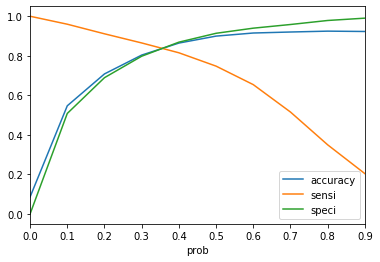

In [342]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Taking 0.3 as the cutoff to get a good sensitivity score

In [343]:
print(classification_report(prediction_lr_df['churn'],prediction_lr_df[0.3]))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      9000
           1       0.29      0.86      0.43       844

    accuracy                           0.80      9844
   macro avg       0.64      0.83      0.66      9844
weighted avg       0.92      0.80      0.84      9844



### A common thing to notice is that, after applying PCA, although we have been to reduce the dimensionality, the metric 'recall' has given us not so better outcomes as compared to when PCA was not applied. From googling I found that PCA improves the model performance but may not always increase accuracy and other metrics such as recall because we may loose out on some information as after all PCA does not consider the response variable / prediction target at all

# Inferences from the Models Above - 

In this assignment 3 approaches were used - 

1. Applying resampling technique to upsample the minority class and then applying various ML Algorithms
2. Applying SMOTE and upsampling the minority class and downsampling the majority class and then applying various ML Algorithms
3. Applying PCA to reduce dimensions and then applying SMOTE to handle imbalance class and then applying various ML Algos

I will be listing out the results and inferences from each of these 3 approaches and then finally will sum up the inferences with some suggestions to detect churn in advance so that something can be done about it.

### Results from the first Approach (Random Upsampling without PCA) - 

1. Decision Tree - Recall for Churners: 0.82 and overall F1 Score: 0.87. Most significant variables - 
<ul><li>total_ic_mou_8</li>
<li>roam_og_mou_8</li>
<li>days_since_recharge</li>
<li>last_day_rch_amt_8</li>
<li>std_og_mou_7</li>
<li>roam_og_mou_7</li></ul>

2. Logistic Regression - Recall for Churners: 0.89(threshold was set at 0.35) and F1 Score: 0.78. Most significant variables - 
<ul><li>loc_og_t2t_mou_8</li>
<li>std_ic_t2t_mou_8</li>
<li>loc_og_t2m_mou_8</li>
<li>last_day_rch_amt_8</li>
<li>std_og_mou_8</li>
<li>loc_ic_mou_8</li>
<li>total_ic_mou_8</li></ul>

3. Random Forest - Recall for Churners: 0.8 and F1 Score: 0.92. Most significant variables - 
<ul><li>loc_ic_t2m_mou_8</li>
<li>loc_ic_mou_8</li>
<li>total_ic_mou_8</li>
<li>loc_og_t2m_mou_8</li>
<li>roam_og_mou_8</li>
<li>loc_og_mou_8</li>
<li>total_og_mou_8</li></ul>


### Results from the second Approach (SMOTE upsampling and undersampling without PCA) - 

1. XGBoost - Recall for Churners: 0.88 and overall F1 Score: 0.91. Most significant variables - 
<ul><li>loc_ic_mou_8</li>
<li>total_ic_mou_8</li>
<li>vol_3g_mb_8</li>
<li>roam_og_mou_8</li>
<li>last_day_rch_amt_8</li>
<li>days_since_recharge</li></ul>

2. Random Forest - Recall for Churners: 0.73 and F1 Score: 0.93. Most significant variables - 
<ul><li>total_ic_mou_8</li>
<li>loc_og_mou_8</li>
<li>loc_og_t2m_mou_8</li>
<li>loc_ic_mou_8</li>
<li>loc_ic_t2m_mou_8</li>
<li>arpu_8</li></ul>

### Results from the third Approach (SMOTE upsampling and undersampling with PCA) - 

1. XGBoost - Recall for Churners: 0.79 and overall F1 Score: 0.88

2. Random Forest - Recall for Churners: 0.6 and F1 Score: 0.91
        
3. Logistic Regression - Recall for Churners: 0.87(threshold was set at 0.30) and F1 Score: 0.83

### Final Inferences - 

A. Model to use to predict whether a customer will churn or not - <br>
<ul><li><u>XGBoost with SMOTE upsampling and undersampling without PCA</u> gives a <u>recall of 0.88 and an F1 score of 0.9</u>. We are more concerned about Recall as we don't want to miss out on churners. Its okay to have false positives as long as we don't miss out on predicting the churners.</li>
    <li><u>Logistic Regression</u> with a threshold set at 0.35 with <u>Random Oversampling and without PCA</u> gives a <u>recall of 0.89 and an F1 score of 0.8</u>. Hence if we are okay to compromise on false positives and are really focused on getting the maximum number of churners, this model should be favoured</li></ul><br>
    
B. Features which form a big factor in predicting if a customer will churn - <br><br>
<ol><li><u>Local Incoming and Outgoing calls in the 8th Month (Action Phase)</u> - A decrease in the number of local calls is a big factor in predicting churn. Of the local outgoing, the calls which were made to other operator's mobile specifically form an important factor in predicting churn</li>
    <li><u>Outgoing Roaming Calls in the 8th Month(Action Phase)</u> - <b>Customers who had more roaming calls are somehow more likely to churn</b>. The visualisations shown below show this more elaborately. The reason could be that the network's roaming services are not upto the mark and hence leads to customer attrition</li>
    <li><u>Days since last recharge and Last recharge amount in the 8th Month</u> - The higher the number of days it has been since the last recharge was made and the lower the recharge amount in the 8th Month, the higher the chances of churn.</ol>

#### Visualising these Significant Variables and drawing inferences - 

In [344]:
high_valued.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0             0.0             0.0             0.0  1069.180  1349.850   
1             0.0             0.0             0.0   378.721   492.223   
2             0.0             0.0             0.0   492.846   205.671   
3             0.0             0.0             0.0   430.975   299.869   
4             0.0             0.0             0.0   690.008    18.980   

     arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0  3171.480        57.84        54.68        52.29        453.43   
1   137.362       413.69       351.03        35.08         94.66   
2   593.260       501.76       108.39       534.24        413.31   
3   187.894        50.51        74.01        70.61        296.29   
4    25.499      1185.91         9.28         7.79         61.64   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0        567.16        325.91          16.23          33.49          31.64   
1         80.63        136.48           0.00           0.00           0.00   
2        119.28        482.46          23.53         144.24          72.11   
3        229.74        162.76           0.00           2.83           0.00   
4          0.00          5.54           0.00           4.76           4.81   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0          23.74          12.59          38.06             51.39   
1           0.00           0.00           0.00            297.13   
2           7.98          35.26           1.44             49.63   
3           0.00          17.74           0.00             42.61   
4           0.00           8.46          13.34             38.99   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0             31.38             40.28            308.63            447.38   
1            217.59             12.49             80.96             70.58   
2              6.19             36.01            151.13             47.28   
3             65.16             67.38            273.29            145.99   
4              0.00              0.00             58.54              0.00   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0            162.28             62.13             55.14             53.23   
1             50.54              0.00              0.00              0.00   
2            294.46              4.54              0.00             23.51   
3            128.28              0.00              4.48             10.26   
4              0.00              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0               0.0              0.00        422.16   
1               0.0               0.0              7.15        378.09   
2               0.0               0.0              0.49        205.31   
3               0.0               0.0              0.00        315.91   
4               0.0               0.0              0.00         97.54   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0        533.91        255.79              4.30             23.29   
1        288.18         63.04            116.56            133.43   
2         53.48        353.99            446.41             85.98   
3        215.64        205.93              7.89              2.58   
4          0.00          0.00           1146.91              0.81   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0             12.01             49.89             31.76             49.14   
1             22.58             13.69             10.04             75.69   
2            498.23            255.36             52.94            156.94   
3              3.23             22.99             64.51             18.29   
4              0.00              1.55              0.00              0.00   

   std_og_t2f_mou_6  std_og_t2f_mo

In [345]:
high_valued_churned = high_valued[high_valued['churn']==1]

In [346]:
import seaborn as sns

Text(0, 0.5, 'Local Outgoing Calls Month 8')

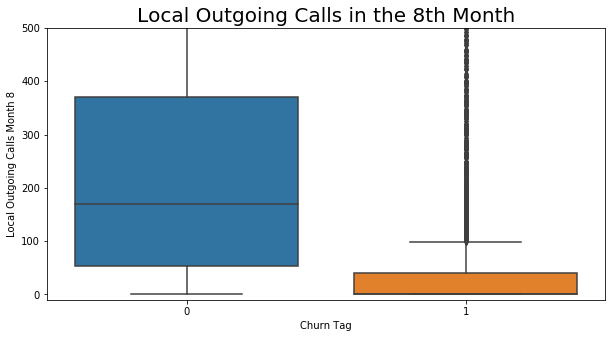

In [347]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(y='loc_og_mou_8',data=high_valued,x='churn')
plt.title('Local Outgoing Calls in the 8th Month',fontsize=20)
ax.set_ylim([-10,500])
ax.set_xlabel('Churn Tag',fontsize=10)
ax.set_ylabel('Local Outgoing Calls Month 8',fontsize=10)

The above visualisation clearly shows that amongst churners, the local outgoing calls are significantly low in the 8th Month

Text(0, 0.5, 'Local Incoming Calls Month 8')

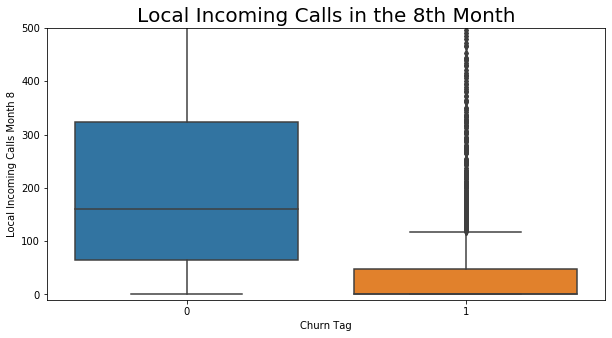

In [348]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(y='loc_ic_mou_8',data=high_valued,x='churn')
plt.title('Local Incoming Calls in the 8th Month',fontsize=20)
ax.set_ylim([-10,500])
ax.set_xlabel('Churn Tag',fontsize=10)
ax.set_ylabel('Local Incoming Calls Month 8',fontsize=10)

The above visualisation clearly shows that amongst churners, the local incoming calls are significantly low in the 8th Month

Text(0, 0.5, 'Local Outgoing Calls')

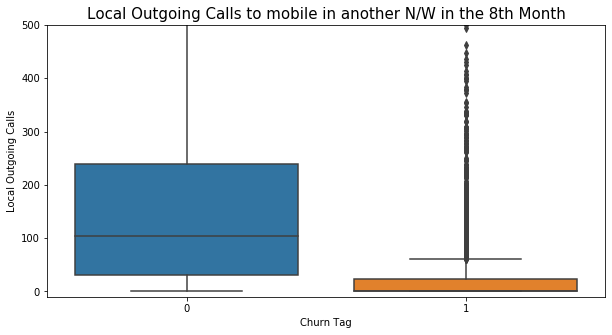

In [349]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(y='loc_og_t2m_mou_8',data=high_valued,x='churn')
plt.title('Local Outgoing Calls to mobile in another N/W in the 8th Month',fontsize=15)
ax.set_ylim([-10,500])
ax.set_xlabel('Churn Tag',fontsize=10)
ax.set_ylabel('Local Outgoing Calls',fontsize=10)

The above visualisation clearly shows that amongst churners, the local outgoing calls to mobiles in another N/W are significantly low in the 8th Month

Text(0, 0.5, 'Roaming Outgoing Calls')

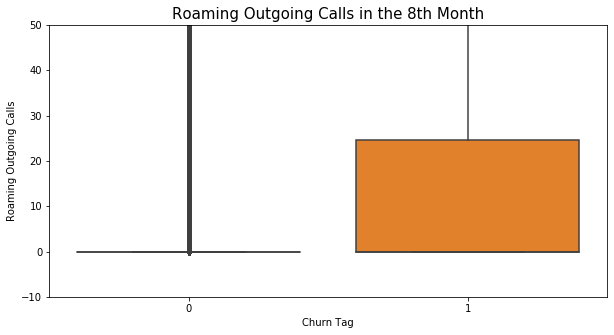

In [350]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(y='roam_og_mou_8',data=high_valued,x='churn')
plt.title('Roaming Outgoing Calls in the 8th Month',fontsize=15)
ax.set_xlabel('Churn Tag',fontsize=10)
ax.set_ylim([-10,50])
ax.set_ylabel('Roaming Outgoing Calls',fontsize=10)

In [351]:
high_valued[['roam_og_mou_8','roam_og_mou_7','roam_og_mou_6','churn']].groupby('churn').mean()

roam_og_mou_8  roam_og_mou_7  roam_og_mou_6
churn                                             
0          19.173390      19.286233      27.013847
1          47.538264      52.662956      54.306206

### The number of roaming outgoing calls have been significantly high amongst the churners. It is very likely that the roaming services is leading to customer attrition.

Text(0, 0.5, 'Days')

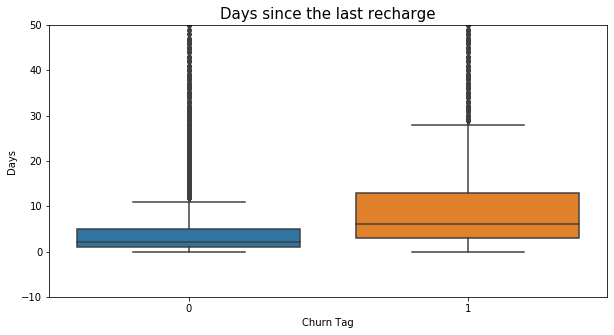

In [352]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(y='days_since_recharge',data=high_valued,x='churn')
plt.title('Days since the last recharge',fontsize=15)
ax.set_xlabel('Churn Tag',fontsize=10)
ax.set_ylim([-10,50])
ax.set_ylabel('Days',fontsize=10)

As the number of days increases since the last recharge, the chances of churn also increases

Text(0, 0.5, 'Amount')

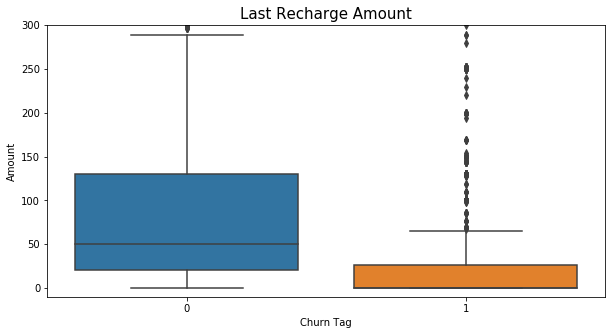

In [353]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(y='last_day_rch_amt_8',data=high_valued,x='churn')
plt.title('Last Recharge Amount',fontsize=15)
ax.set_xlabel('Churn Tag',fontsize=10)
ax.set_ylim([-10,300])
ax.set_ylabel('Amount',fontsize=10)

The last recharge amount done in the 8th Month for churners is significantly low. Less than 30 units/rs.

In [354]:
out_going_monthwise = high_valued[['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','churn']].groupby('churn').mean().reset_index()

In [355]:
out_going_monthwise

churn  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8
0      0    291.698387    297.431869    280.861236
1      1    188.525554    145.409511     53.214589

<b>The mean outgoing calls for non churners remain almost the same across months while for churners it dips drastically.</b>

In [356]:
print("% drop in outgoing calls amongst churners from month 6 to 7 is",round(((188-143)/188)*100,2),"%")

% drop in outgoing calls amongst churners from month 6 to 7 is 23.94 %


In [357]:
incoming_monthwise = high_valued[['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','churn']].groupby('churn').mean().reset_index()

In [358]:
incoming_monthwise

churn  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8
0      0    251.506271    258.801592    252.291457
1      1    168.958721    137.520735     50.040064

<b>The mean incoming calls for non churners remain almost the same across months while for churners it dips drastically.</b>

In [359]:
print("% drop in outgoing calls amongst churners from month 6 to 7 is",round(((169-135)/169)*100,2),"%")

% drop in outgoing calls amongst churners from month 6 to 7 is 20.12 %


In [360]:
last_rech_amt_monthwise = high_valued[['last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8','churn']].groupby('churn').mean().reset_index()

In [361]:
last_rech_amt_monthwise

churn  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8
0      0          104.103687          107.093838          101.282063
1      1          100.060389           80.202225           34.415177

<b>The mean recharge amount MoM for non churners remain almost the same across months while for churners it dips drastically.</b>

In [362]:
print("% drop in outgoing calls amongst churners from month 6 to 7 is",round(((101-78)/101)*100,2),"%")

% drop in outgoing calls amongst churners from month 6 to 7 is 22.77 %


### An alarm must be raised if the number of outgoing calls, incoming calls and the recharge amount drops by more than 20% MoM. These are cases where the possibility of churn is very high.